# Analysis 4.0

# Plotting and Packages 

In [1]:
#import settings and functions from color coding and plotting notebook 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


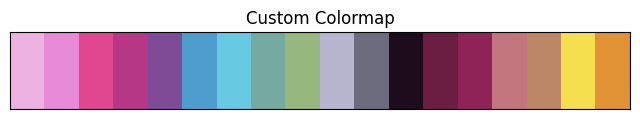

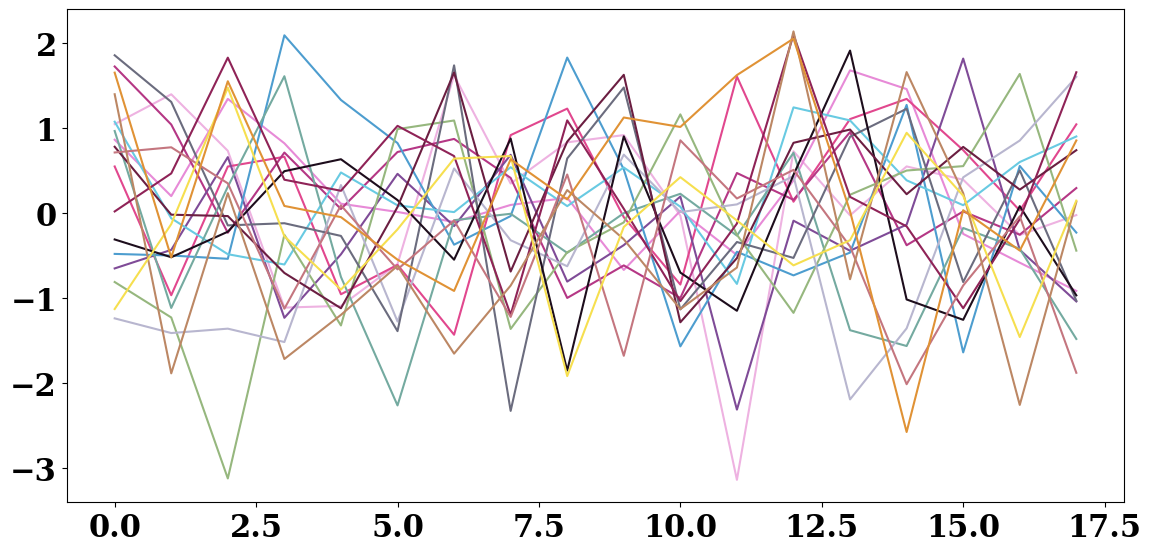

In [2]:
%run "Color Coding and Plotting.ipynb"

# Import data

In [3]:
%%time
with open('OpenAlex Data/Unify2024/05032024OriginalData.pkl', 'rb') as f:
    article_author_data_original = pickle.load(f)

CPU times: user 2.9 s, sys: 3.71 s, total: 6.61 s
Wall time: 29.1 s


# Analysis

## Description

In [37]:
#total length
print("N original data:", len(article_author_data_original))
print("N clean data:", len(article_author_data_final))


N original data: 2000281
N clean data: 1471903


In [38]:
#distinct articles length
print("N unique articles original data:", len(article_author_data_original.drop_duplicates(subset=['article_id'], keep='first')))
print("N unique articles clean data:", len(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first')))


N unique articles original data: 518351
N unique articles clean data: 470029


In [39]:
#distinct authors length
print("N unique authors original data:", len(article_author_data_original.drop_duplicates(subset=['author_id'], keep='first')))
print("N unique authors clean data:", len(article_author_data_final.drop_duplicates(subset=['author_id'], keep='first')))


N unique authors original data: 810843
N unique authors clean data: 676613


In [ ]:
# Replace empty lists with NaN
article_author_data_final['grants'] = article_author_data_final['grants'].apply(lambda x: np.nan if len(x) == 0 else x)
article_author_data_final['grants'][article_author_data_final['grants'].notna()==True]=1 #1 means they have a grant 
article_author_data_final['grants'] = article_author_data_final['grants'].fillna(0) #zero means they don't have a grant 

In [48]:
article_author_data_final.author_publication_rate.replace(np.inf, 0, inplace=True)


In [49]:
article_author_data_final.author_publication_rate.mean()

0.8427409979895784

In [50]:
article_author_data_final.author_publication_rate.std()

1.3454711952192782

In [32]:
topics_data_final.domain.value_counts(normalize=False)

domain
research     1186707
education     256319
Name: count, dtype: int64

In [33]:
topics_data_final.domain.value_counts(normalize=True)*100

domain
research     82.237396
education    17.762604
Name: proportion, dtype: float64

# Gender Assignment Update 

# Initial

In [41]:
article_author_data_original.predicted_gender.isna().sum()

0

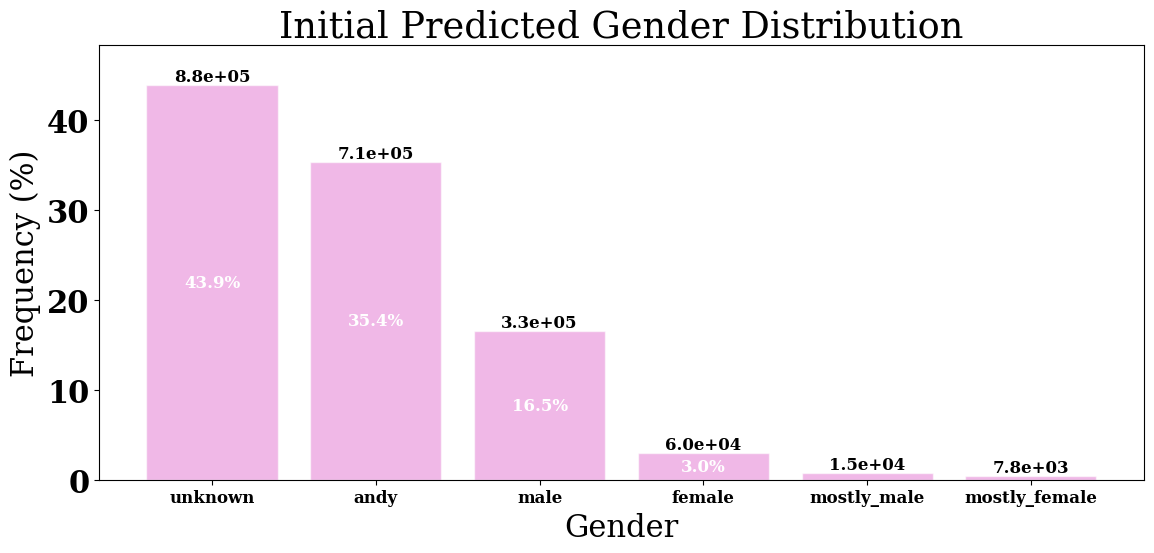

In [42]:
cat_plot(article_author_data_original.predicted_gender, title='Initial Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='originalpredictedgender')


In [43]:
original_data_distinct_author=article_author_data_original.drop_duplicates(subset=['author_id'], keep='first')


In [44]:
andy_country=original_data_distinct_author.author_country_name[original_data_distinct_author.predicted_gender=='andy']
andy_country=andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia'})
andy_name=original_data_distinct_author.extracted_first_name[original_data_distinct_author.predicted_gender=='andy']


In [13]:
unknown_country=original_data_distinct_author.author_country_name[original_data_distinct_author.predicted_gender=='unknown']
unknown_country=unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India'})
unknown_name=original_data_distinct_author.extracted_first_name[original_data_distinct_author.predicted_gender=='unknown']

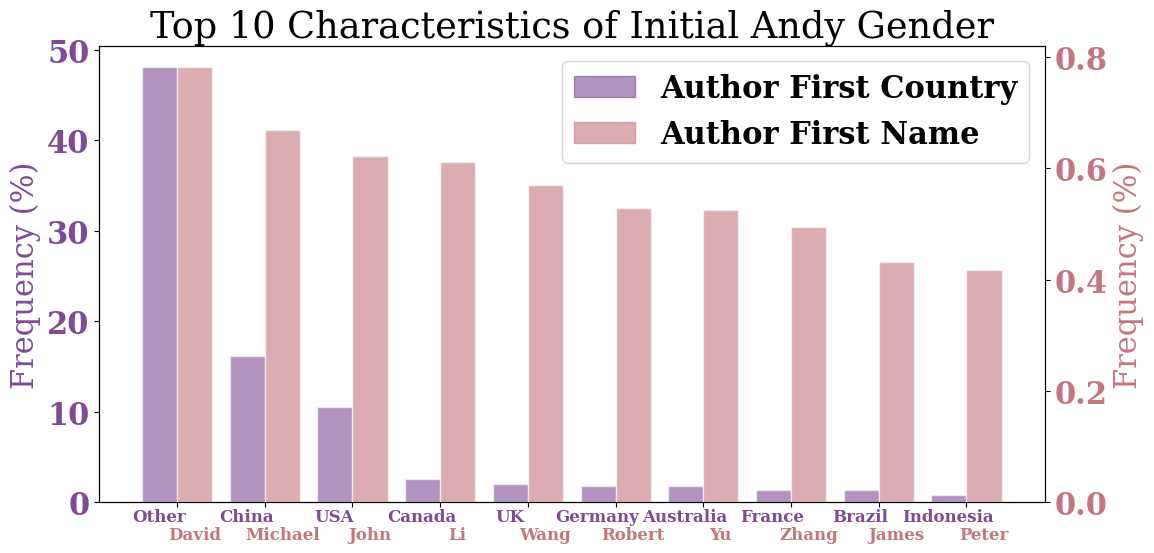

In [57]:
cat_top_plot_dual_axis(andy_country, andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Initial Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_initial')


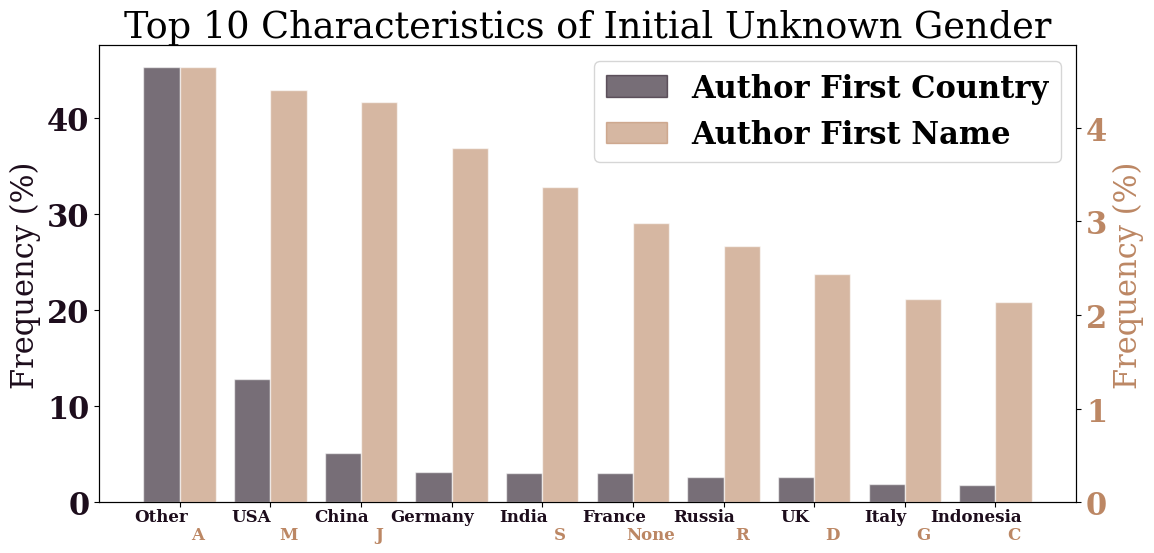

In [56]:
cat_top_plot_dual_axis(unknown_country, unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Initial Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_initial')


## First Update: Look for Duplicates in Author ID with an Assigned Gender

In [32]:
with open('OpenAlex Data/Unify2024/02032024FirstUpdatedArticleAuthorData19702023.pkl', 'rb') as f:
    article_author_data_first_update = pickle.load(f)

In [33]:
article_author_data_first_update.predicted_gender.isna().sum()

0

In [34]:
len(article_author_data_first_update)

2000281

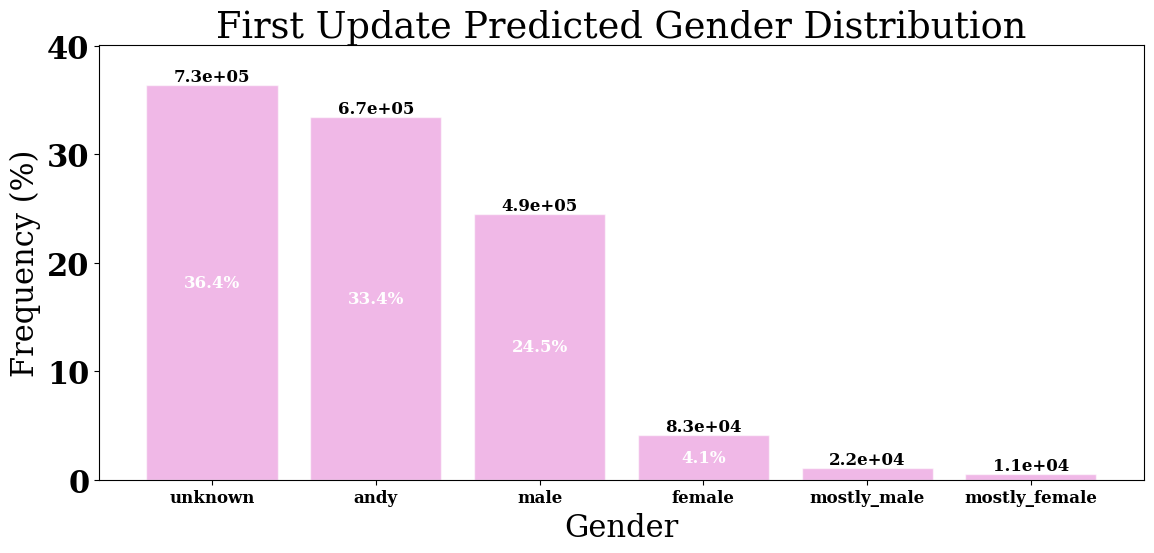

In [58]:
cat_plot(article_author_data_first_update.predicted_gender, title='First Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='firstupdatepredictedgender')


In [37]:
article_author_data_first_update.predicted_gender.value_counts()-article_author_data_original.predicted_gender.value_counts()

predicted_gender
unknown         -151168
andy             -39498
male             158860
female            22270
mostly_male        6480
mostly_female      3056
Name: count, dtype: int64

In [172]:
first_andy_country=article_author_data_first_update.author_country_name[article_author_data_first_update.predicted_gender=='andy']
first_andy_country=first_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia'})
first_andy_name=article_author_data_first_update.extracted_first_name[article_author_data_first_update.predicted_gender=='andy']


In [173]:
first_unknown_country=article_author_data_first_update.author_country_name[article_author_data_first_update.predicted_gender=='unknown']
first_unknown_country=first_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India'})
first_unknown_name=article_author_data_first_update.extracted_first_name[article_author_data_first_update.predicted_gender=='unknown']

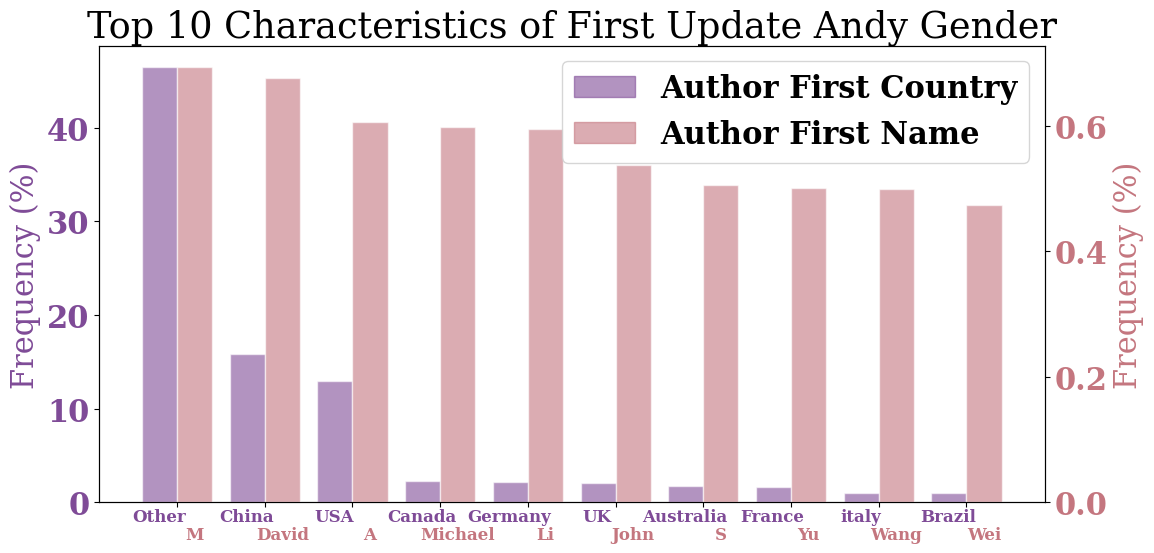

In [174]:
cat_top_plot_dual_axis(first_andy_country, first_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of First Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_first')


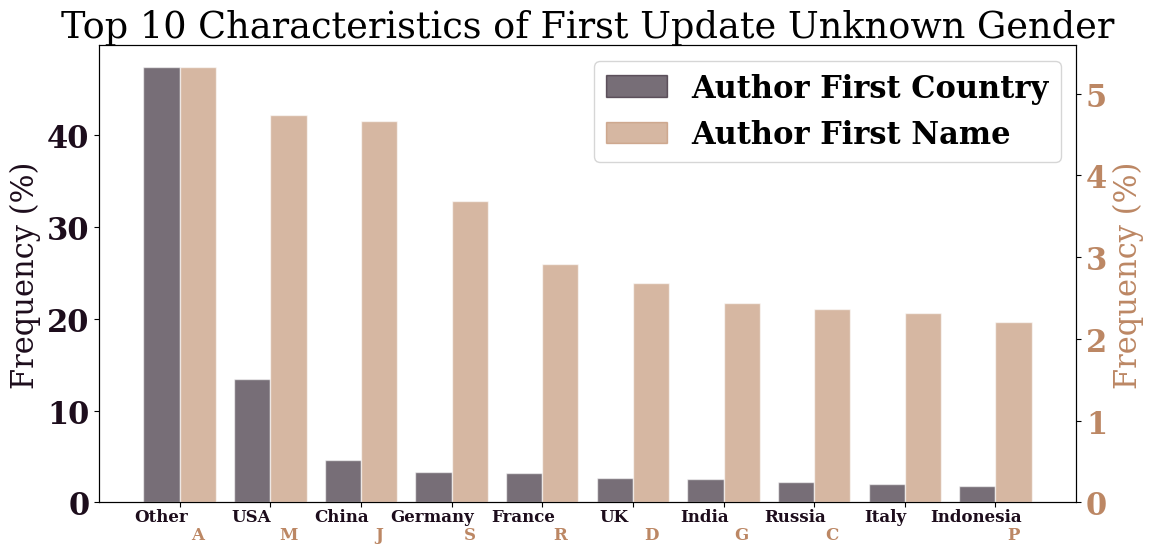

In [175]:
cat_top_plot_dual_axis(first_unknown_country, first_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of First Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_first')


## Second Update: Update Without Country 

In [68]:
#get the version that we already got 
with open('OpenAlex Data/Unify2024/02032024SecondUpdatedArticleAuthorData19702023.pkl', 'rb') as f:
    article_author_data_second_update = pickle.load(f)


In [69]:
article_author_data_second_update.predicted_gender.isna().sum()

0

In [70]:
len(article_author_data_second_update)

2000281

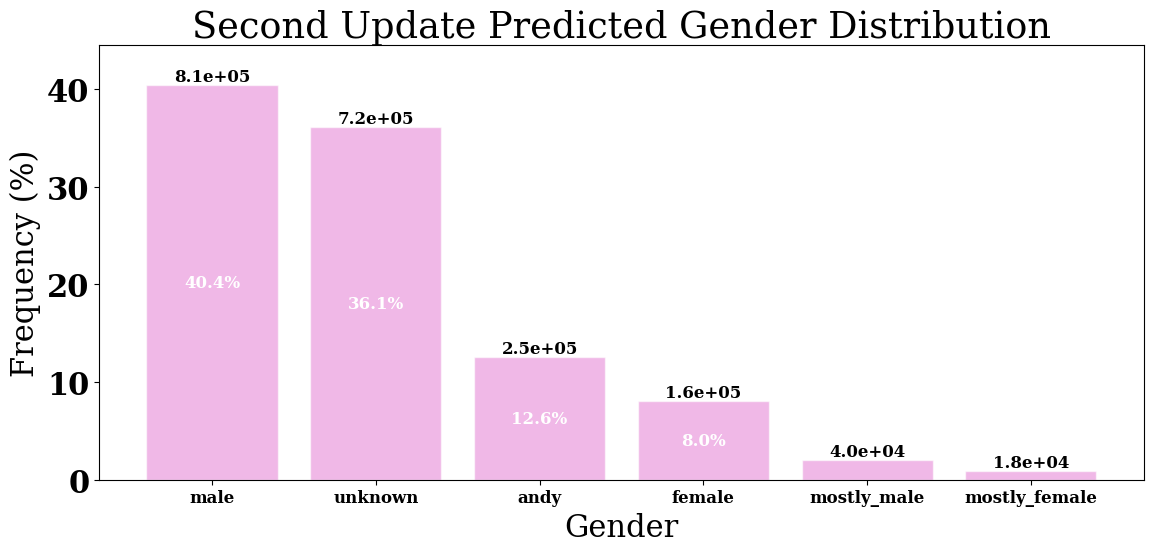

In [71]:
cat_plot(article_author_data_second_update.predicted_gender, title='Second Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='secondupdatepredictedgender')


In [72]:
article_author_data_second_update.predicted_gender.value_counts()-article_author_data_first_update.predicted_gender.value_counts()

predicted_gender
andy            -416085
female            77980
male             318475
mostly_female      7022
mostly_male       18083
unknown           -5475
Name: count, dtype: int64

In [176]:
second_andy_country=article_author_data_second_update.author_country_name[article_author_data_second_update.predicted_gender=='andy']
second_andy_country=second_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
second_andy_name=article_author_data_second_update.extracted_first_name[article_author_data_second_update.predicted_gender=='andy']


In [177]:
second_unknown_country=article_author_data_second_update.author_country_name[article_author_data_second_update.predicted_gender=='unknown']
second_unknown_country=second_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
second_unknown_name=article_author_data_second_update.extracted_first_name[article_author_data_second_update.predicted_gender=='unknown']

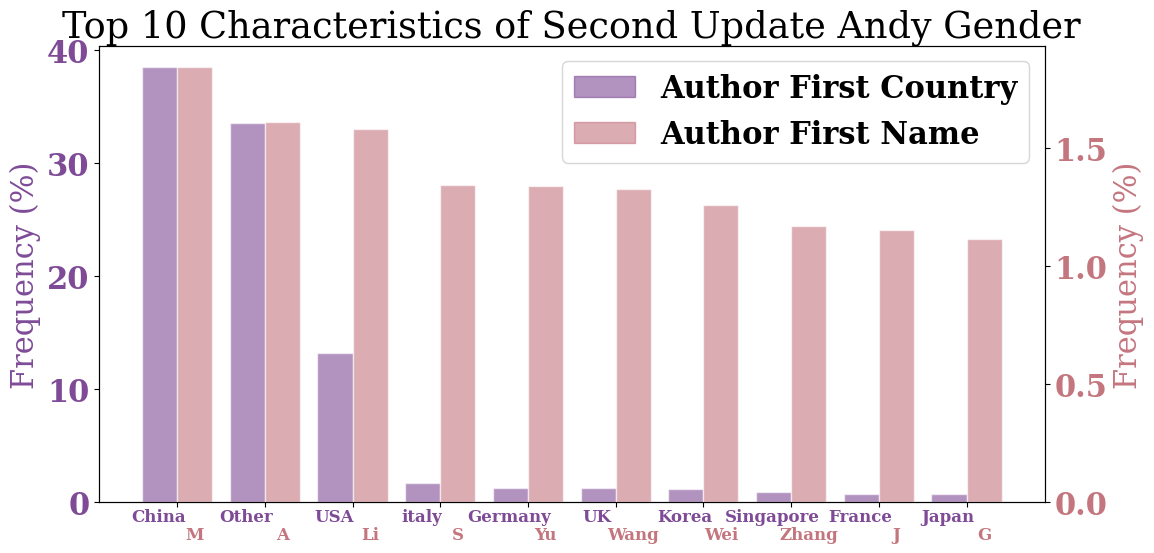

In [178]:
cat_top_plot_dual_axis(second_andy_country, second_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Second Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_second')


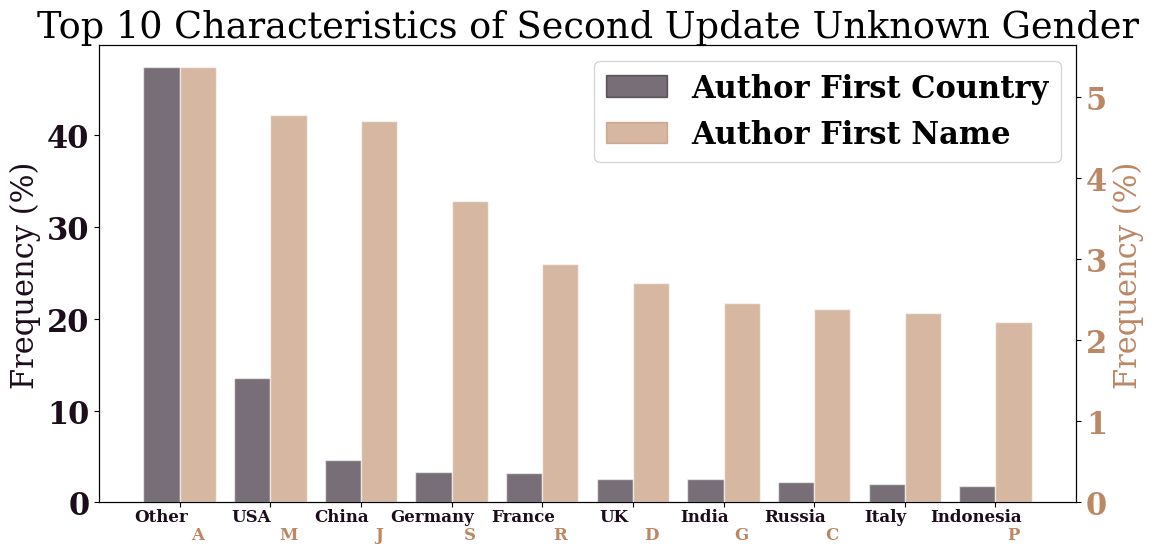

In [179]:
cat_top_plot_dual_axis(second_unknown_country, second_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Second Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_second')


## Third Update: Drop Rows With Invalid Names 

In [157]:
article_author_data_third_update=article_author_data_second_update.copy()

In [166]:
# Apply the condition and create new dataframes without the rows where the name is just one letter
article_author_data_third_update = article_author_data_third_update[article_author_data_third_update['extracted_first_name'].apply(lambda x: len(x) > 1)].copy()

#check that it works 
print("Length of original dataframe:", f'N={len(article_author_data_second_update)}', "Length of clean dataframe:", f'N={len(article_author_data_third_update)}')

Length of original dataframe: N=2000281 Length of clean dataframe: N=1468452


In [171]:
article_author_data_third_update.predicted_gender.isna().sum()

0

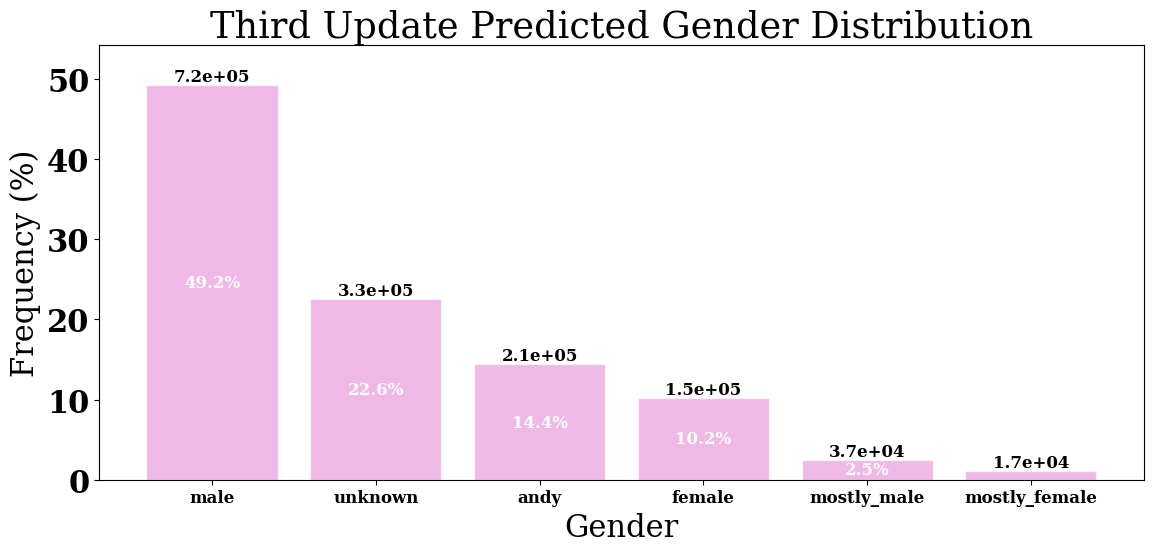

In [191]:
cat_plot(article_author_data_third_update.predicted_gender, title='Third Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='thirdupdatepredictedgender')


In [192]:
article_author_data_third_update.predicted_gender.value_counts()-article_author_data_second_update.predicted_gender.value_counts()

predicted_gender
male             -85228
unknown         -390872
andy             -40720
female           -10983
mostly_male       -2899
mostly_female     -1127
Name: count, dtype: int64

In [167]:
third_andy_country=article_author_data_third_update.author_country_name[article_author_data_third_update.predicted_gender=='andy']
third_andy_country=third_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
third_andy_name=article_author_data_third_update.extracted_first_name[article_author_data_third_update.predicted_gender=='andy']


In [168]:
third_unknown_country=article_author_data_third_update.author_country_name[article_author_data_third_update.predicted_gender=='unknown']
third_unknown_country=third_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
third_unknown_name=article_author_data_third_update.extracted_first_name[article_author_data_third_update.predicted_gender=='unknown']

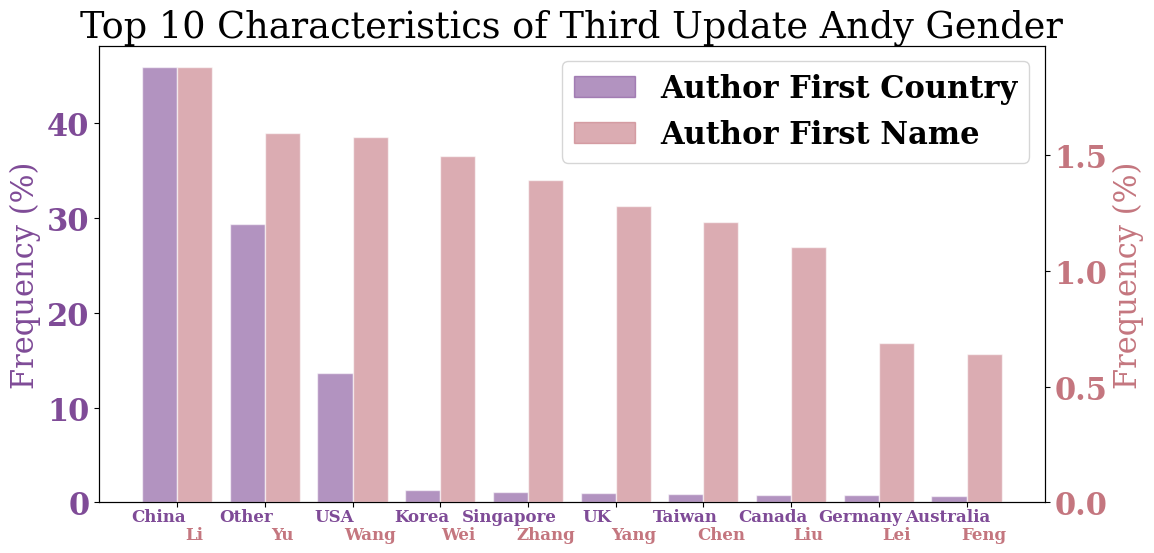

In [169]:
cat_top_plot_dual_axis(third_andy_country, third_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Third Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_third')


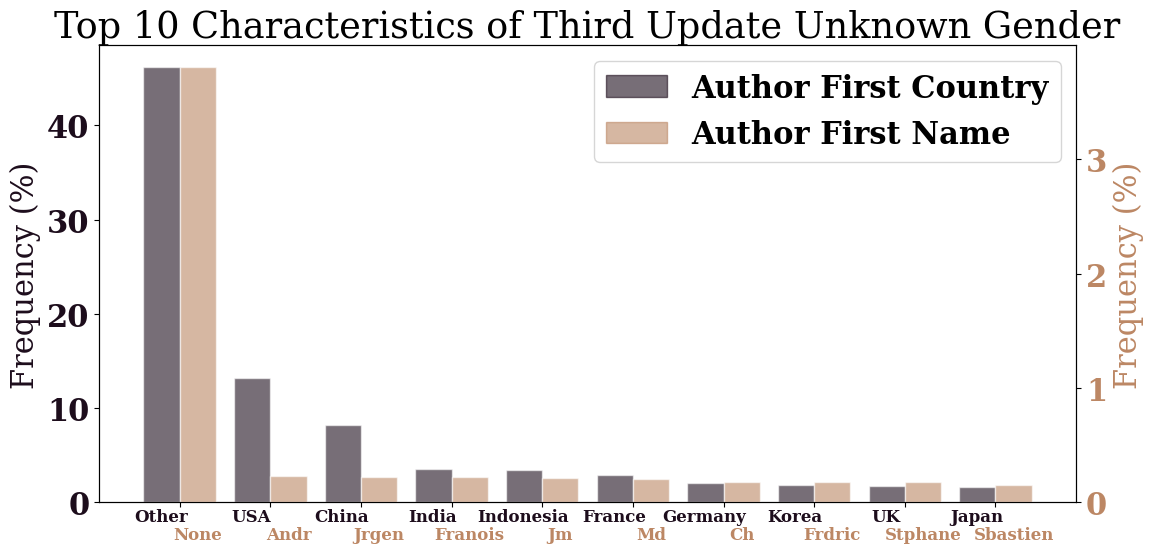

In [170]:
cat_top_plot_dual_axis(third_unknown_country, third_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Third Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_third')


## Fourth Update: Update Names Including Special Characters 

In [182]:
#clearly andy gender are chinese names and unknown gender are "undefined" names with special characters that have not been read right.


In [183]:
def update_wrong_names_gender(df):
    # Create a copy of the original dataframe
    df_updated = df.copy()

    # Initialize gender detector
    detector = gender.Detector(case_sensitive=False)

    # Identify rows where predicted_gender is 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])

    # Group by author_id and find the most common selected_full_name for rows with 'andy' or 'unknown'
    most_common_names = df_updated[mask_unknown_andy].groupby('author_id')['selected_full_name'].apply(
        lambda x: x.mode().iloc[0] if not x.empty else None
    ).reset_index()

    # Merge most_common_names back to the original dataframe to get the corresponding extracted_first_name
    df_updated = pd.merge(df_updated, most_common_names, on='author_id', how='left', suffixes=('', '_most_common'))

    # Update extracted_first_name with the first part of the most common name for rows with 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])
    df_updated.loc[mask_unknown_andy, 'extracted_first_name'] = df_updated.loc[mask_unknown_andy, 'selected_full_name_most_common'].apply(
    lambda x: str(x).split(' ')[0] if isinstance(x, str) else '')



    # Update predicted_gender based on the updated extracted_first_name for rows with 'andy' or 'unknown'
    conditions = (df_updated['author_country_name_api'].isin(['unknown', 'other_countries']))

    # Add tqdm for progress monitoring
    for idx in tqdm(df_updated[mask_unknown_andy].index, desc='Updating gender predictions'):
        row = df_updated.loc[idx]
        if conditions[idx]:
            df_updated.at[idx, 'predicted_gender'] = detector.get_gender(row['extracted_first_name'])
        else:
            df_updated.at[idx, 'predicted_gender'] = detector.get_gender(row['extracted_first_name'], row['author_country_name_api'])

    # Drop unnecessary columns from the intermediate steps
    df_updated = df_updated.drop(['selected_full_name_most_common'], axis=1, errors='ignore')

    return df_updated


In [184]:
%%time
article_author_data_fourth_update = update_wrong_names_gender(article_author_data_third_update)


Updating gender predictions: 100%|███| 542455/542455 [00:23<00:00, 23194.73it/s]


CPU times: user 26.3 s, sys: 10.5 s, total: 36.8 s
Wall time: 1min 33s


In [185]:
len(article_author_data_fourth_update)

1468452

In [186]:
article_author_data_fourth_update.predicted_gender.isna().sum()

0

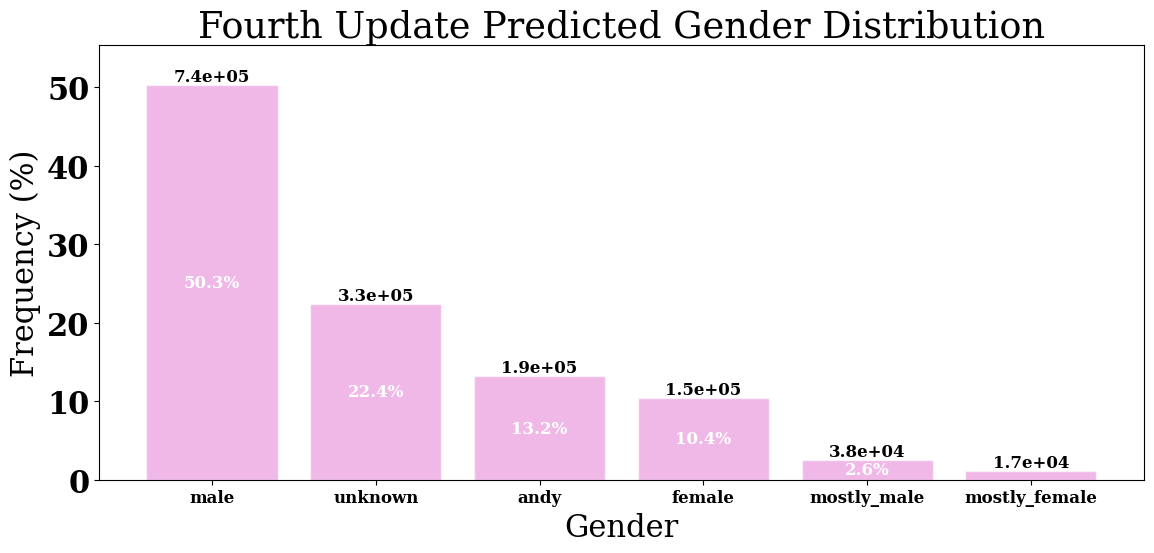

In [193]:
cat_plot(article_author_data_fourth_update.predicted_gender, title='Fourth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='fourthupdatepredictedgender')


In [194]:
article_author_data_fourth_update.predicted_gender.value_counts()-article_author_data_third_update.predicted_gender.value_counts()

predicted_gender
male             15869
unknown          -2013
andy            -17938
female            2940
mostly_male       1082
mostly_female       60
Name: count, dtype: int64

In [187]:
fourth_andy_country=article_author_data_fourth_update.author_country_name[article_author_data_fourth_update.predicted_gender=='andy']
fourth_andy_country=fourth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
fourth_andy_name=article_author_data_fourth_update.extracted_first_name[article_author_data_fourth_update.predicted_gender=='andy']


In [188]:
fourth_unknown_country=article_author_data_fourth_update.author_country_name[article_author_data_fourth_update.predicted_gender=='unknown']
fourth_unknown_country=fourth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
fourth_unknown_name=article_author_data_fourth_update.extracted_first_name[article_author_data_fourth_update.predicted_gender=='unknown']

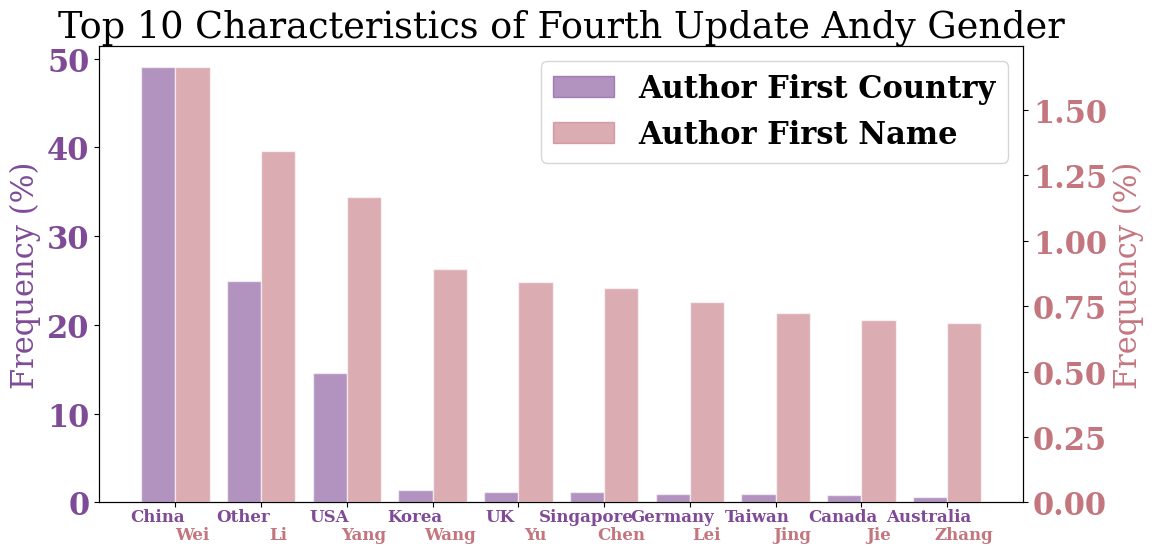

In [189]:
cat_top_plot_dual_axis(fourth_andy_country, fourth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Fourth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_fourth')


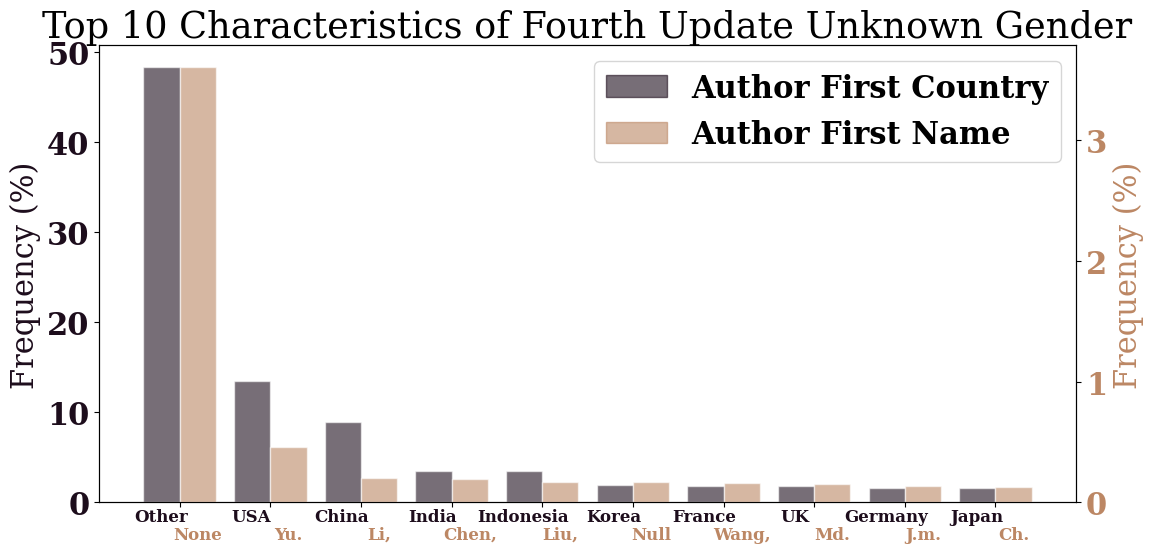

In [190]:
cat_top_plot_dual_axis(fourth_unknown_country, fourth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Fourth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_fourth')


## Fifth Update: Update None Names 

In [204]:
#let's check what the "none" names looks like now 
article_author_data_fourth_update[['selected_full_name', 'extracted_first_name', 'predicted_gender']][article_author_data_fourth_update['extracted_first_name']=='none'].value_counts()

#they are all none, unknown so we can discard these from the data

selected_full_name                 extracted_first_name  predicted_gender
none nana                          none                  unknown             18
none 梁潇文                           none                  unknown             13
none 江志晃                           none                  unknown             11
none 张福龙                           none                  unknown             10
none nina notman, special to c&en  none                  unknown             10
                                                                             ..
none 岳龙金                           none                  unknown              1
none 岳甜甜                           none                  unknown              1
none 岳炜坤                           none                  unknown              1
none 岳森                            none                  unknown              1
zhu xing-long                      none                  unknown              1
Name: count, Length: 9386, dtype: int64

In [205]:
#let's create an algorithm that can extract the name in "selected full name" that is not none.
#so if the name is "none subiki" it should select subiki rather than "none" and then replace "extracted first name" with that instead. 
#then it should also update gender if it updates the name - however only if the gender is "unknown" or "andy" 

In [206]:
def update_none_name_and_gender(df):

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Create a mask for rows where 'extracted_first_name' is 'none' and 'selected_full_name' is not 'none anonymous'
    mask = (df_copy['extracted_first_name'] == 'none') & (df_copy['selected_full_name'] != 'none anonymous')

    # Update 'extracted_first_name' with the second part of 'selected_full_name' separated by space
    df_copy.loc[mask, 'extracted_first_name'] = df_copy.loc[mask, 'selected_full_name'].apply(lambda x: x.split(' ')[1] if ' ' in x and 'anonymous' not in x else x)

    # Create a mask for rows where 'predicted_gender' is either 'unknown' or 'andy'
    mask_unknown_gender = df_copy['predicted_gender'].isin(['unknown', 'andy'])

    # Create a mask for rows where 'author_country_name_api' is in ["unknown", "other_countries", "none"]
    mask_unknown_country = df_copy['author_country_name_api'].isin(['unknown', 'other_countries', 'none'])

    # Update 'predicted_gender' based on 'extracted_first_name' and 'author_country_name_api'
    detector = gender.Detector(case_sensitive=False)
    df_copy.loc[mask & mask_unknown_gender & ~mask_unknown_country, 'predicted_gender'] = df_copy.loc[mask & mask_unknown_gender & ~mask_unknown_country].apply(lambda row: detector.get_gender(row['extracted_first_name'], row['author_country_name_api']), axis=1)

    # Update 'predicted_gender' based on 'extracted_first_name' only
    df_copy.loc[mask & mask_unknown_gender & mask_unknown_country, 'predicted_gender'] = df_copy.loc[mask & mask_unknown_gender & mask_unknown_country, 'extracted_first_name'].apply(lambda x: detector.get_gender(x))

    return df_copy


In [207]:
#try on the entire clean dataframe 
article_author_data_fifth_update=update_none_name_and_gender(article_author_data_fourth_update)

In [210]:
#let's check what the "none" names looks like now 
article_author_data_fifth_update[['selected_full_name', 'extracted_first_name', 'predicted_gender']][article_author_data_fourth_update['extracted_first_name']=='none'].value_counts()

#they are all none, unknown so we can discard these from the data

selected_full_name  extracted_first_name  predicted_gender
none nana           nana                  female              18
none 梁潇文            梁潇文                   unknown             13
none 江志晃            江志晃                   unknown             11
none 张福龙            张福龙                   unknown             10
none 张云龙            张云龙                   unknown             10
                                                              ..
none 岳森             岳森                    unknown              1
none 岳晓芳            岳晓芳                   unknown              1
none 岳春燕            岳春燕                   unknown              1
none 岳成杰            岳成杰                   unknown              1
zhu xing-long       xing-long             unknown              1
Name: count, Length: 9388, dtype: int64

In [209]:
len(article_author_data_fifth_update)

1468452

In [211]:
article_author_data_fifth_update.predicted_gender.isna().sum()

0

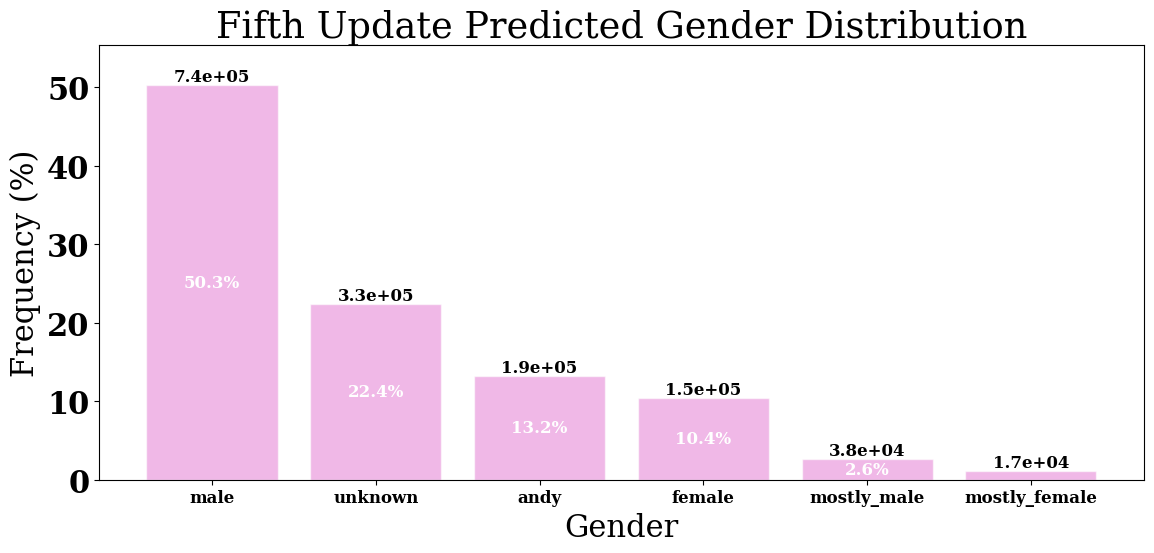

In [212]:
cat_plot(article_author_data_fifth_update.predicted_gender, title='Fifth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='fifthupdatepredictedgender')


In [213]:
article_author_data_fifth_update.predicted_gender.value_counts()-article_author_data_fourth_update.predicted_gender.value_counts()

predicted_gender
male              165
unknown         -1021
andy              650
female            148
mostly_male        27
mostly_female      31
Name: count, dtype: int64

In [214]:
fifth_andy_country=article_author_data_fifth_update.author_country_name[article_author_data_fifth_update.predicted_gender=='andy']
fifth_andy_country=fifth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
fifth_andy_name=article_author_data_fifth_update.extracted_first_name[article_author_data_fifth_update.predicted_gender=='andy']


In [215]:
fifth_unknown_country=article_author_data_fifth_update.author_country_name[article_author_data_fifth_update.predicted_gender=='unknown']
fifth_unknown_country=fifth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
fifth_unknown_name=article_author_data_fifth_update.extracted_first_name[article_author_data_fifth_update.predicted_gender=='unknown']

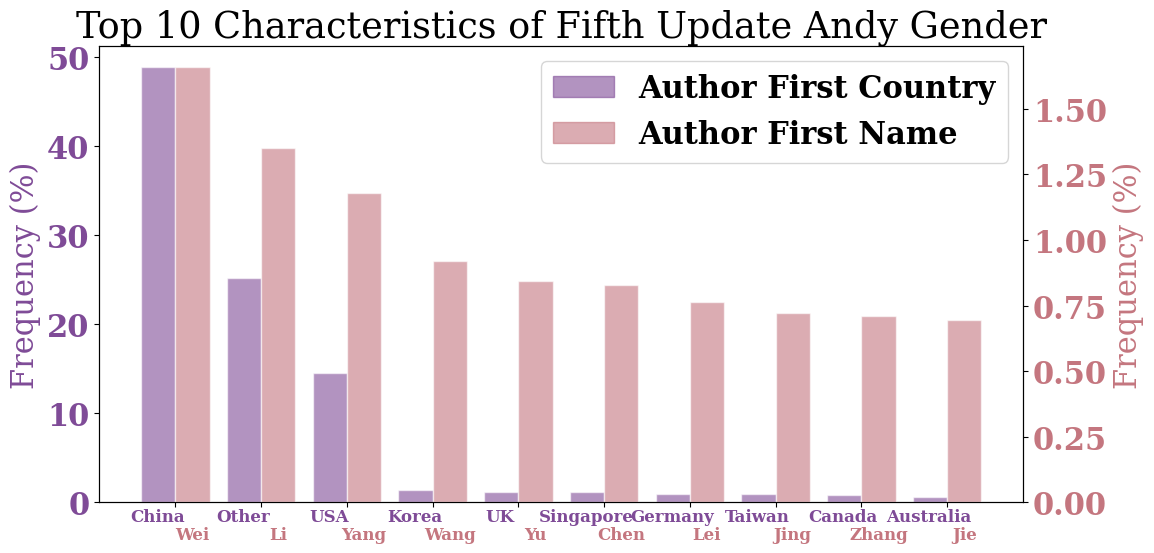

In [216]:
cat_top_plot_dual_axis(fifth_andy_country, fifth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Fifth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_fifth')


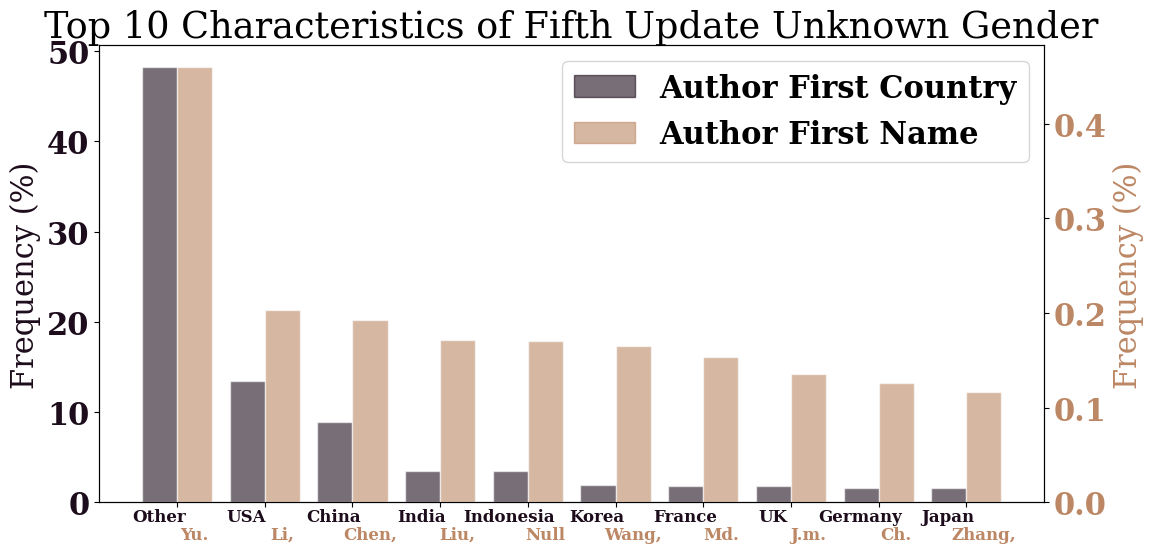

In [217]:
cat_top_plot_dual_axis(fifth_unknown_country, fifth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Fifth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_fifth')


In [ ]:
#should we maybe make an update where we make sure to remove those names containing , and . etc 

## Sixth Update: Remove , and . from names and update again 

In [231]:
def strip_name(name):
    if not name:
        return name  # Return empty string if name is empty
    if name[-1] in ('.', ',', '-') and len(name) > 1 and not name[-2].isspace():
        return name[:-1]
    else:
        return name


In [232]:
# Assuming df is your DataFrame containing the "extracted_first_name" column
article_author_data_fifth_update['extracted_first_name'] = article_author_data_fifth_update['extracted_first_name'].apply(strip_name)


In [233]:
article_author_data_fifth_update['extracted_first_name']

0                 rolf
1                  e.m
2               thomas
3                   ya
4                   yu
              ...     
1468447         reyhan
1468448    abdulrahman
1468449         subash
1468450         arshad
1468451         hashim
Name: extracted_first_name, Length: 1468452, dtype: object

In [249]:
from tqdm import tqdm

def update_updated_names_gender(df):
    # Create a copy of the original dataframe
    df_updated = df.copy()

    # Initialize gender detector
    detector = gender.Detector(case_sensitive=False)

    # Identify rows where predicted_gender is 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])

    # Define function to update gender based on first name and country
    def update_gender(row):
        if pd.isna(row['extracted_first_name']):
            return row['predicted_gender']  # Return original gender if first name is missing
        elif row['author_country_name_api'] in ['unknown', 'other_countries']:
            return detector.get_gender(row['extracted_first_name'])
        else:
            return detector.get_gender(row['extracted_first_name'], row['author_country_name_api'])

    # Update predicted_gender based on the updated extracted_first_name and country
    df_updated.loc[mask_unknown_andy, 'predicted_gender'] = df_updated[mask_unknown_andy].apply(update_gender, axis=1)

    return df_updated


In [254]:
article_author_data_sixth_update = update_updated_names_gender(article_author_data_fifth_update)


In [255]:
len(article_author_data_sixth_update)

1468452

In [256]:
article_author_data_sixth_update.predicted_gender.isna().sum()

0

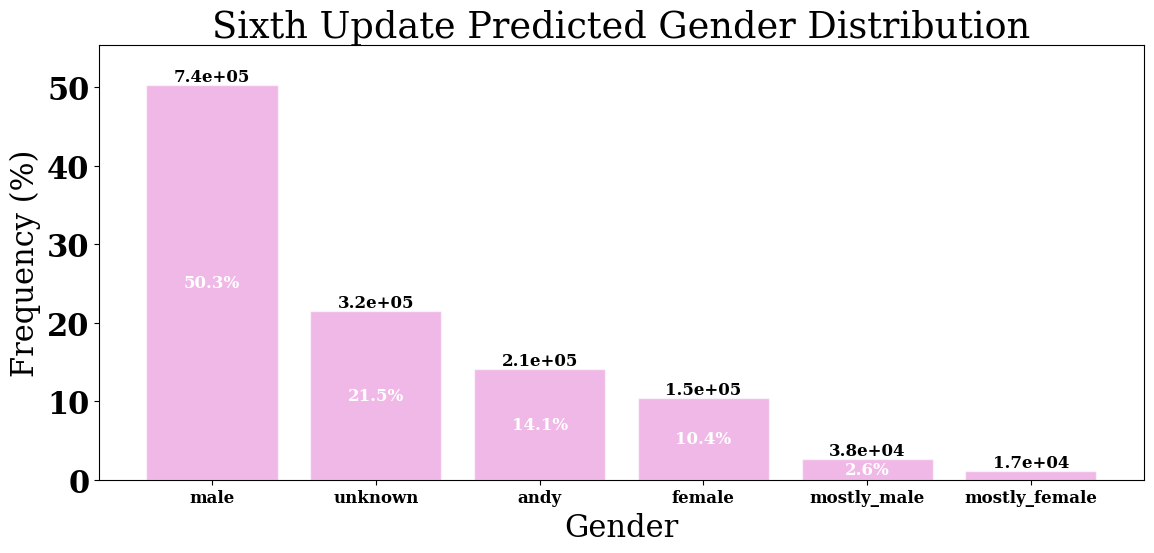

In [259]:
cat_plot(article_author_data_sixth_update.predicted_gender, title='Sixth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='sixthupdatepredictedgender')


In [260]:
article_author_data_sixth_update.predicted_gender.value_counts()-article_author_data_fifth_update.predicted_gender.value_counts()

predicted_gender
male                84
unknown         -13110
andy             13008
female               7
mostly_male          3
mostly_female        8
Name: count, dtype: int64

In [262]:
sixth_andy_country=article_author_data_sixth_update.author_country_name[article_author_data_sixth_update.predicted_gender=='andy']
sixth_andy_country=sixth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
sixth_andy_name=article_author_data_sixth_update.extracted_first_name[article_author_data_sixth_update.predicted_gender=='andy']


In [263]:
sixth_unknown_country=article_author_data_sixth_update.author_country_name[article_author_data_sixth_update.predicted_gender=='unknown']
sixth_unknown_country=sixth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
sixth_unknown_name=article_author_data_sixth_update.extracted_first_name[article_author_data_sixth_update.predicted_gender=='unknown']

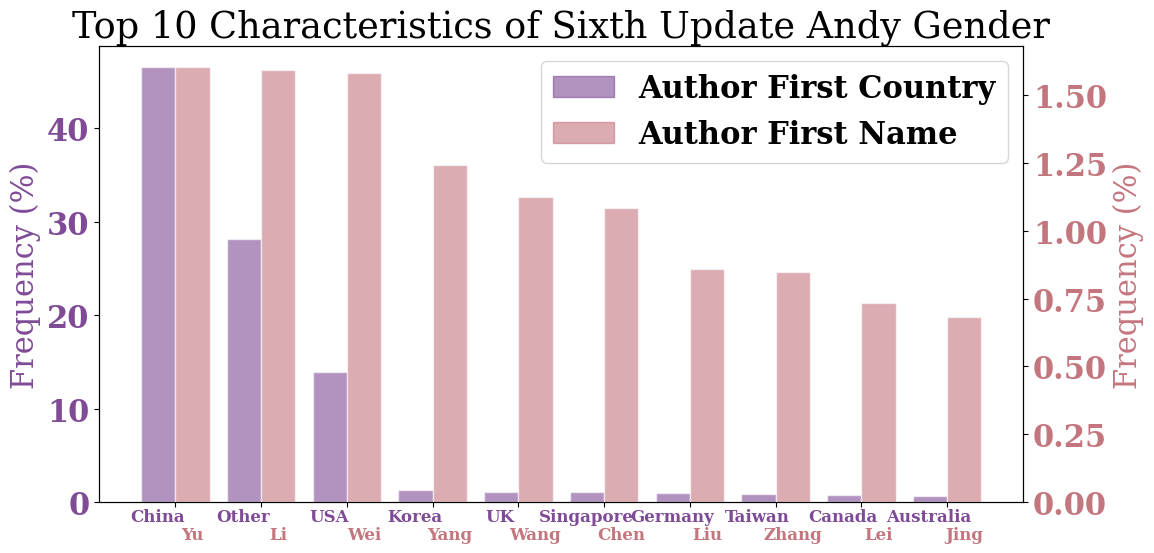

In [264]:
cat_top_plot_dual_axis(sixth_andy_country, sixth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Sixth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_sixth')


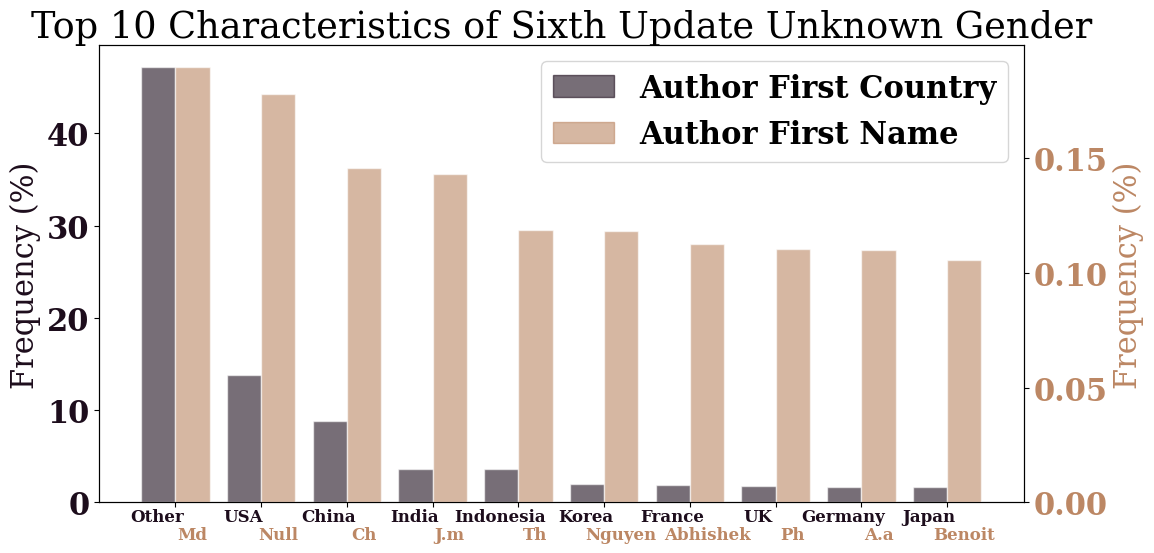

In [265]:
cat_top_plot_dual_axis(sixth_unknown_country, sixth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Sixth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_sixth')


## Seventh Update: Update Andy/Unknown Value With Gender of Identical Name

### Load Update 7

In [4]:
%%time
with open('OpenAlex Data/Unify2024/11042024CleanArticleAuthorDataUpdateSeventh19702023.pkl', 'rb') as f:
    article_author_data_seventh_update = pickle.load(f)

CPU times: user 2.26 s, sys: 3.28 s, total: 5.54 s
Wall time: 26.8 s


In [5]:
len(article_author_data_seventh_update)

1468452

In [6]:
article_author_data_seventh_update.predicted_gender.isna().sum()

0

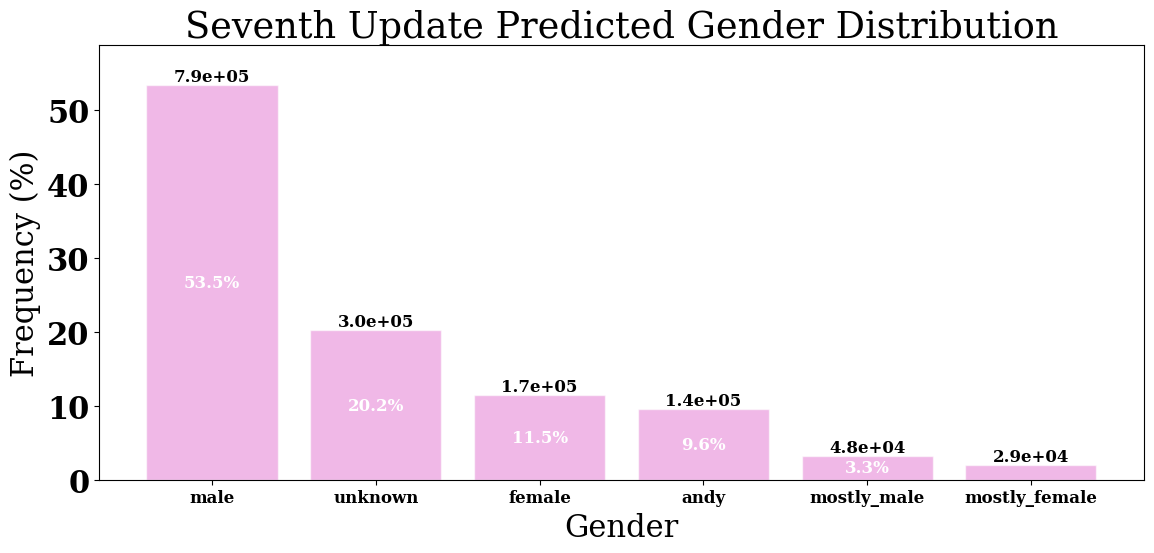

In [278]:
cat_plot(article_author_data_seventh_update.predicted_gender, title='Seventh Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='seventhupdatepredictedgender')


In [279]:
article_author_data_seventh_update.predicted_gender.value_counts()-article_author_data_sixth_update.predicted_gender.value_counts()

predicted_gender
andy            -66166
female           16338
male             45925
mostly_female    12163
mostly_male      10101
unknown         -18361
Name: count, dtype: int64

In [280]:
seventh_andy_country=article_author_data_seventh_update.author_country_name[article_author_data_seventh_update.predicted_gender=='andy']
seventh_andy_country=seventh_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
seventh_andy_name=article_author_data_seventh_update.extracted_first_name[article_author_data_seventh_update.predicted_gender=='andy']


In [281]:
seventh_unknown_country=article_author_data_seventh_update.author_country_name[article_author_data_seventh_update.predicted_gender=='unknown']
seventh_unknown_country=seventh_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
seventh_unknown_name=article_author_data_seventh_update.extracted_first_name[article_author_data_seventh_update.predicted_gender=='unknown']

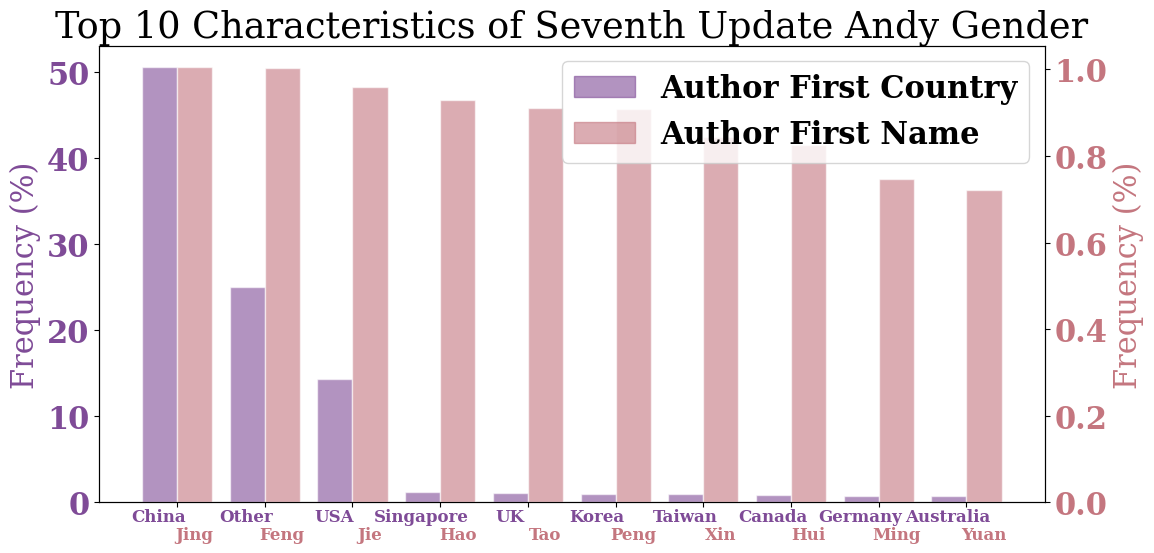

In [282]:
cat_top_plot_dual_axis(seventh_andy_country, seventh_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Seventh Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_seventh')


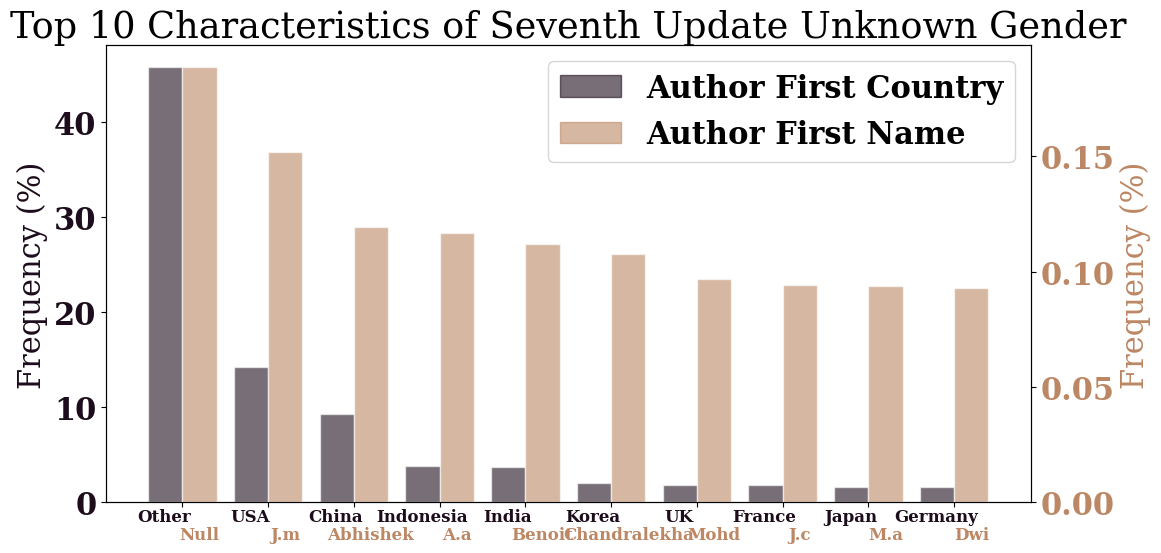

In [283]:
cat_top_plot_dual_axis(seventh_unknown_country, seventh_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Seventh Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_seventh')


## Eight Update: Update Genders of Top Appearing Unkown/Andy Names with Gender API 

### Load Update 8

In [8]:
gender_gender_api_final=pd.read_csv('Data Backup/gender_gender_api_final.csv')


In [9]:
#now we should merge these back to our full data 
article_author_data_eighth_update=article_author_data_seventh_update.copy()

In [10]:
#if the name in the dataframe is in the df_gender_api and the gender of that name is "unknown" or "andy"
#it should take the gender of that name in df_gender_api and replace it 
article_author_data_eighth_update = pd.merge(article_author_data_eighth_update, gender_gender_api_final, left_on="extracted_first_name", right_on="name_gender_api", how="left")


In [11]:
#now we need to replace the value in predicted_gender with the value in gender_gender_api IF
#1) the predicted_gender is andy or unknown and 
#2) the gender_gender_api is not NaN


mask = (article_author_data_eighth_update['predicted_gender'].isin(['andy', 'unknown'])) & (~article_author_data_eighth_update['gender_gender_api'].isna())
article_author_data_eighth_update.loc[mask, 'predicted_gender'] = article_author_data_eighth_update.loc[mask, 'gender_gender_api']


In [12]:
len(article_author_data_eighth_update)

1468452

In [13]:
article_author_data_eighth_update.predicted_gender.isna().sum()

0

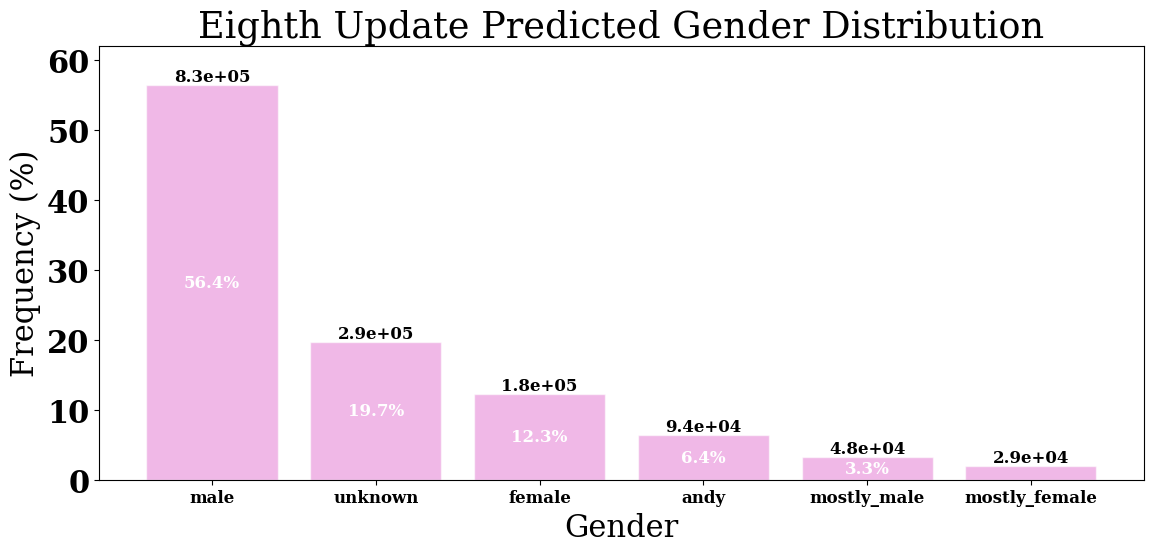

In [488]:
cat_plot(article_author_data_eighth_update.predicted_gender, title='Eighth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='eighthupdatepredictedgender')


In [489]:
article_author_data_eighth_update.predicted_gender.value_counts()-article_author_data_seventh_update.predicted_gender.value_counts()

predicted_gender
male             43204
unknown          -7598
female           10948
andy            -46554
mostly_male          0
mostly_female        0
Name: count, dtype: int64

In [490]:
eighth_andy_country=article_author_data_eighth_update.author_country_name[article_author_data_eighth_update.predicted_gender=='andy']
eighth_andy_country=eighth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
eighth_andy_name=article_author_data_eighth_update.extracted_first_name[article_author_data_eighth_update.predicted_gender=='andy']


In [491]:
eighth_unknown_country=article_author_data_eighth_update.author_country_name[article_author_data_eighth_update.predicted_gender=='unknown']
eighth_unknown_country=eighth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
eighth_unknown_name=article_author_data_eighth_update.extracted_first_name[article_author_data_eighth_update.predicted_gender=='unknown']

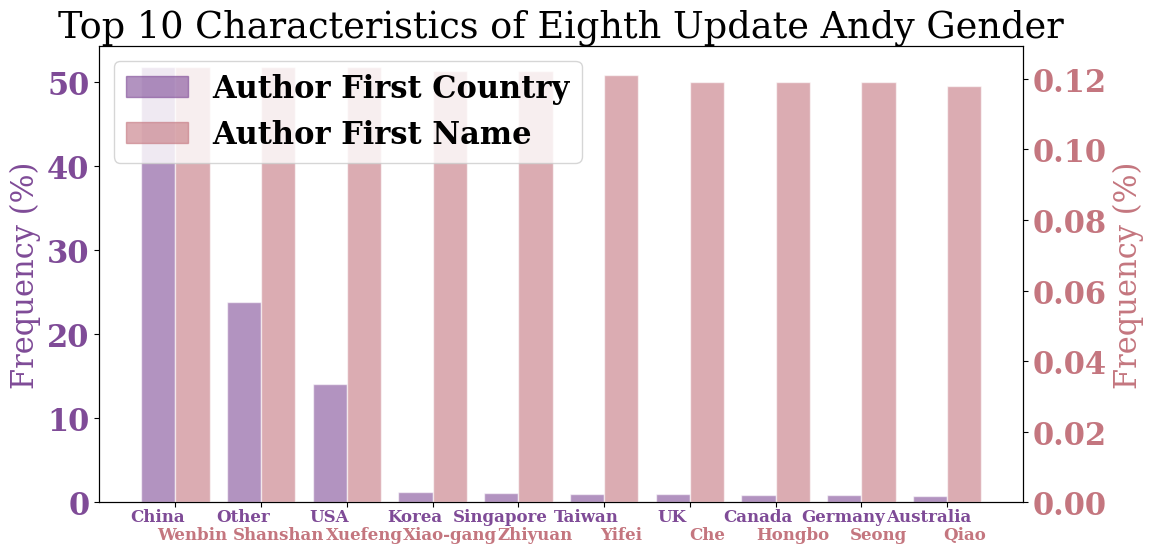

In [492]:
cat_top_plot_dual_axis(eighth_andy_country, eighth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Eighth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_eighth')


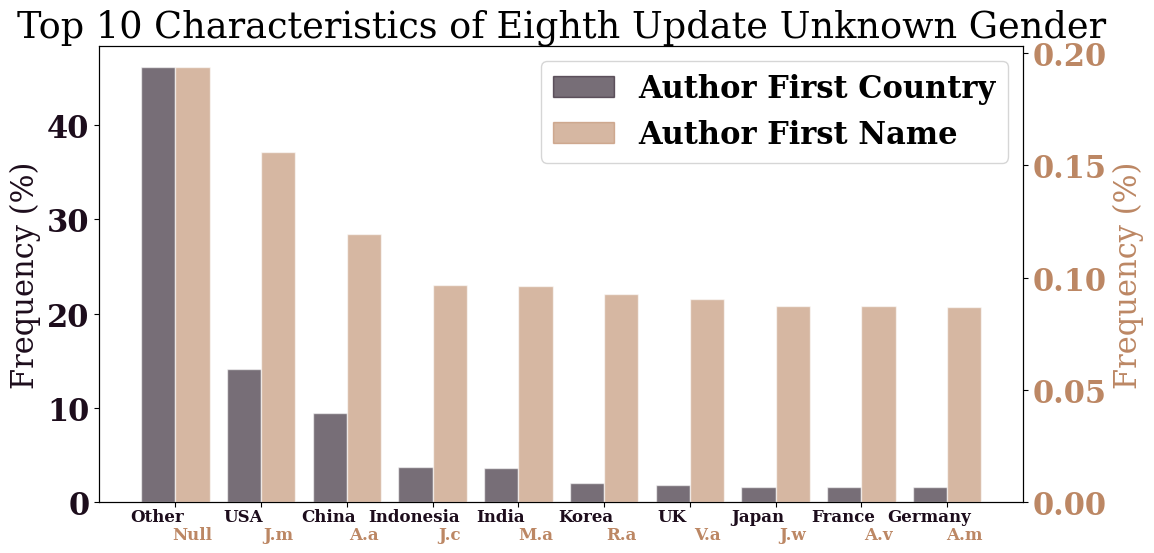

In [493]:
cat_top_plot_dual_axis(eighth_unknown_country, eighth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Eighth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_eighth')


## Ninth Update: Remove non-sense names

In [14]:
article_author_data_ninth_update=article_author_data_eighth_update.copy()

In [15]:
#let's first filter out meaningless names before using the gender API 
article_author_data_ninth_update = article_author_data_ninth_update[~article_author_data_ninth_update['extracted_first_name'].str.match(r'^[a-zA-Z]\.|^[a-zA-Z]\,$')]
#and filter out the NULL one since that doesn't make sense 
article_author_data_ninth_update=article_author_data_ninth_update[article_author_data_ninth_update['extracted_first_name']!='NULL']

In [497]:
len(article_author_data_ninth_update)

1432907

In [498]:
article_author_data_ninth_update.predicted_gender.isna().sum()

0

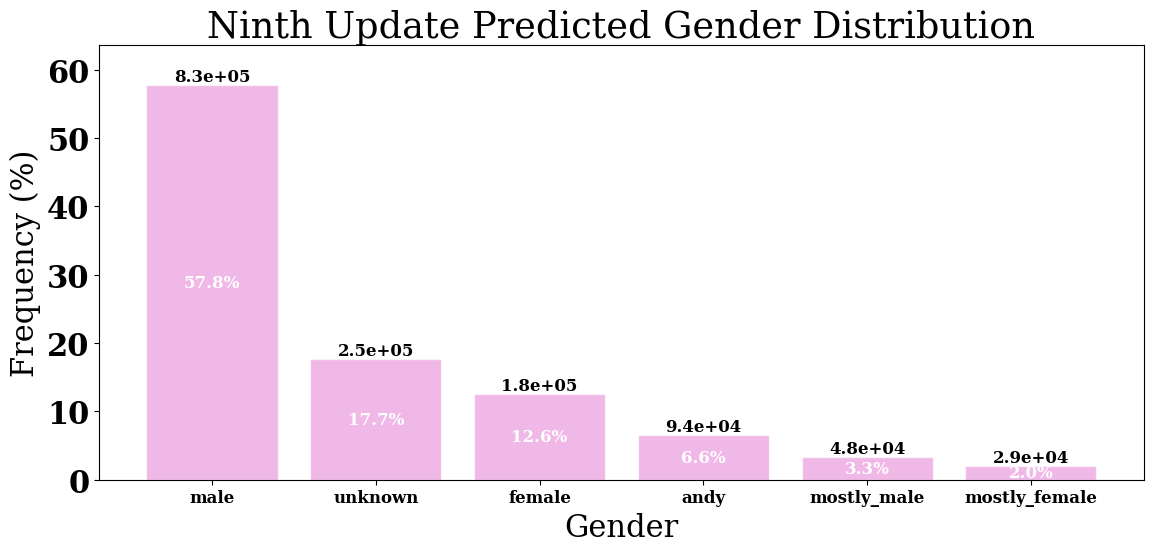

In [499]:
cat_plot(article_author_data_ninth_update.predicted_gender, title='Ninth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='ninthupdatepredictedgender')


In [500]:
article_author_data_ninth_update.predicted_gender.value_counts()-article_author_data_eighth_update.predicted_gender.value_counts()

predicted_gender
male                -1
unknown         -35544
female               0
andy                 0
mostly_male          0
mostly_female        0
Name: count, dtype: int64

In [501]:
ninth_andy_country=article_author_data_ninth_update.author_country_name[article_author_data_ninth_update.predicted_gender=='andy']
ninth_andy_country=ninth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
ninth_andy_name=article_author_data_ninth_update.extracted_first_name[article_author_data_ninth_update.predicted_gender=='andy']


In [502]:
ninth_unknown_country=article_author_data_ninth_update.author_country_name[article_author_data_ninth_update.predicted_gender=='unknown']
ninth_unknown_country=ninth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
ninth_unknown_name=article_author_data_ninth_update.extracted_first_name[article_author_data_ninth_update.predicted_gender=='unknown']

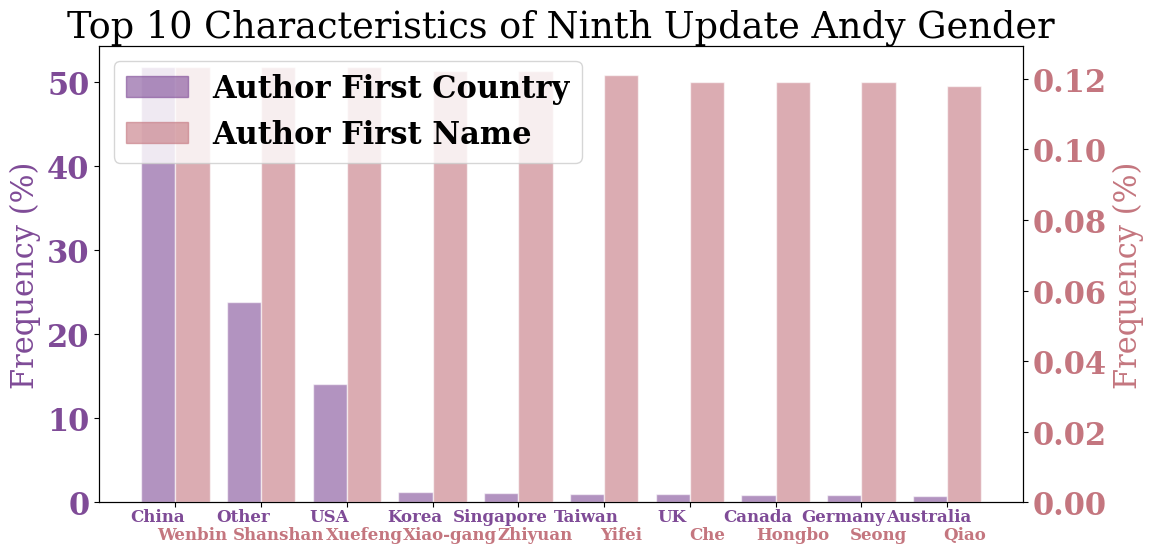

In [503]:
cat_top_plot_dual_axis(ninth_andy_country, ninth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Ninth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_ninth')


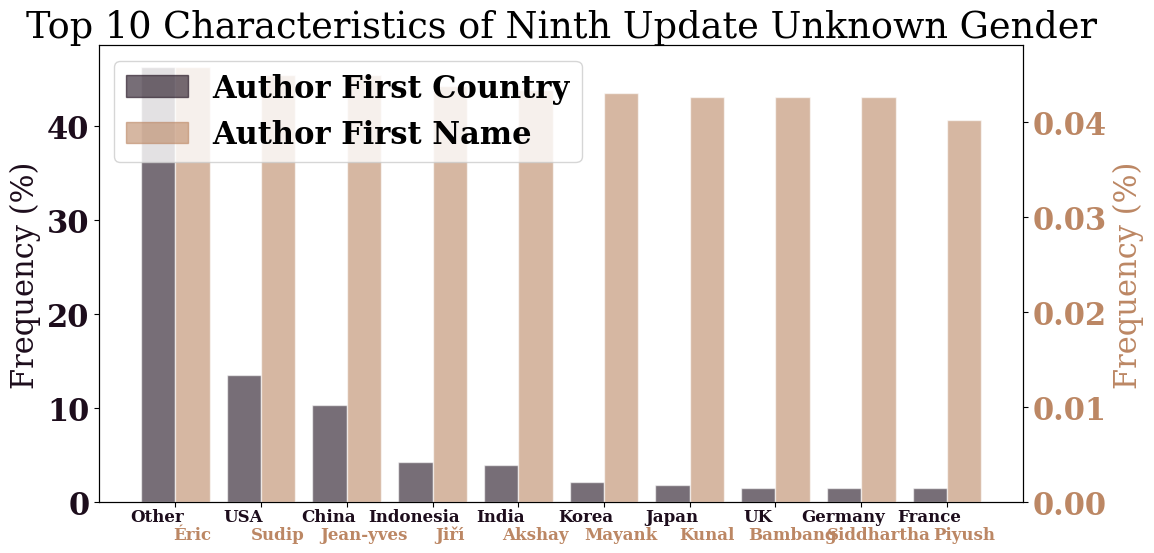

In [504]:
cat_top_plot_dual_axis(ninth_unknown_country, ninth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Ninth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_ninth')


# Final 

In [16]:
article_author_data_final = article_author_data_ninth_update.copy()

In [17]:
#create new column with only binary gender so female/male 
article_author_data_final['binary_gender']=article_author_data_final['predicted_gender']
article_author_data_final['binary_gender']=article_author_data_final['binary_gender'].replace({'mostly_male': 'male'})
article_author_data_final['binary_gender']=article_author_data_final['binary_gender'].replace({'mostly_female': 'female'})
# set unknown and andy as nan
article_author_data_final['binary_gender'].replace('unknown', np.nan, inplace=True)
article_author_data_final['binary_gender'].replace('andy', np.nan, inplace=True)



In [18]:
#let's save this data version so that we can import it later 
with open('OpenAlex Data/Unify2024/11042024FinalData.pkl', 'wb') as f:
    pickle.dump(article_author_data_final, f)


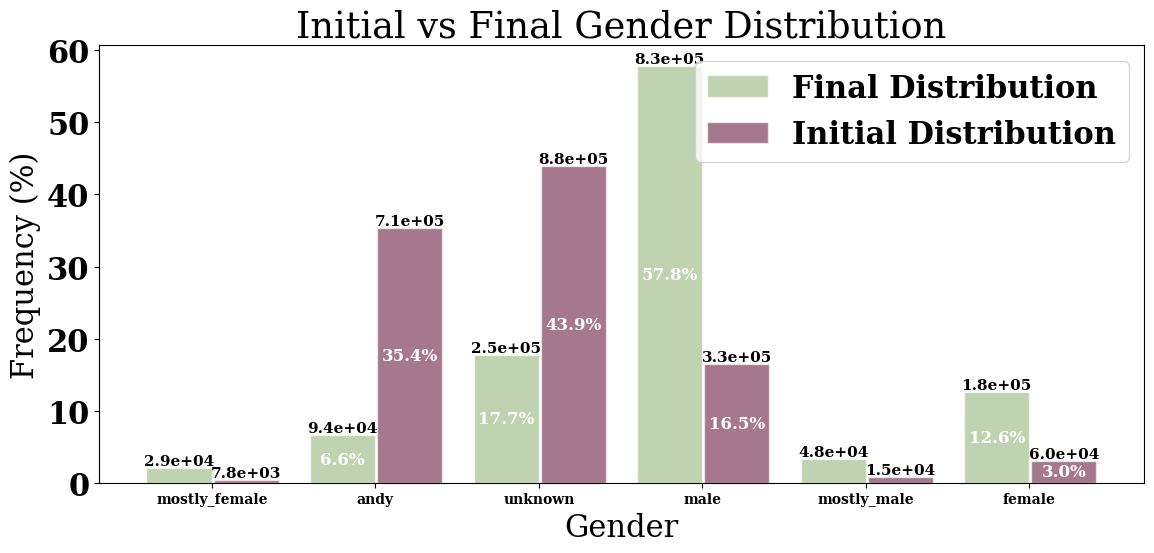

In [572]:
cat_plot_compare(article_author_data_final.predicted_gender, article_author_data_original.predicted_gender, 
                 color1=color9, color2=color13, legend_loc='upper right',
                 title='Initial vs Final Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, font=font, rot=0, xmargins=None, save_name='finalgenderdistcompare', label1='Final Distribution', label2='Initial Distribution')


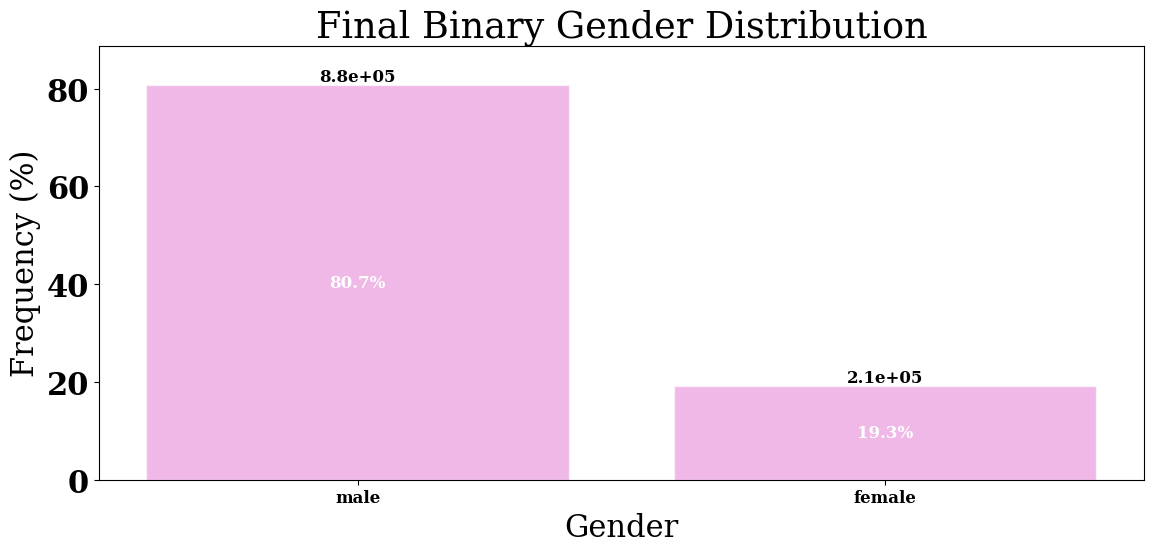

In [19]:
cat_plot(article_author_data_final.binary_gender, title='Final Binary Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='finalbinarygenderdist')


# Distributions

## World Map

In [51]:
#calc percentage of country appearing
df_country_proportion=article_author_data_final.author_first_country.value_counts(normalize=True).mul(100).reset_index()
df_country_count=article_author_data_final.author_first_country.value_counts(normalize=False).reset_index()

In [52]:
df_country=pd.merge(df_country_proportion, df_country_count, on='author_first_country')


In [53]:
# generate country code for map plotting 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_2=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df_country['map_code']=alpha3code(df_country.author_first_country)


In [67]:
#import world dataset
world = gpd.read_file('ne_110m_admin_0_countries.dbf')


In [69]:
world = world[['ADMIN', 'ISO_A3', 'GU_A3', 'CONTINENT',  'geometry']] 
world.columns=['map_name', 'map_code', 'GU_A3', 'continent',  'geometry']


In [70]:
world['map_code'][world['map_code']=='-99']=world['GU_A3']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_62305/2184410109.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
world=world.drop(columns=['GU_A3'])

In [72]:
# Data for the rows to add for the world map 
add_country_data = {
    'map_name': ['Singapore', 'Virgin Islands, British', 'Hong Kong', 'Malta','Macao', 'Bahrain', 'Mauritius', 'Monaco','Barbados','Réunion',
                 'Holy See (Vatican City State)','Bermuda','Martinique','French Guiana','Faroe Islands','Guadeloupe','Svalbard and Jan Mayen',
                 'Liechtenstein','Montserrat','Palau','Curaçao','Dominica','Cayman Islands','Grenada','Guam','French Polynesia','Cabo Verde',
                 'Sao Tome And Principe','Antigua And Barbuda'],
    'map_code': ['SGP', 'VGB','HKG','MLT','MAC','BHR','MUS','MCO','BRB','REU',
                 'VAT','BMU','MTQ','GUF','FRO','GLP','SJM',
                 'LIE','MSR','PLW','CUW','DMA','CYM','GRD','GUM','PYF','CPV',
                 'STP','ATG']
                }

# Create a new DataFrame with the rows to add
new_rows_df = pd.DataFrame(add_country_data)

# add new rows to the world map
world = pd.concat([world, new_rows_df], ignore_index=True)

In [73]:
# then merge complete world with our data 
merge_map=pd.merge(world,df_country,on='map_code')

In [74]:
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
location=location.rename(columns={"name": "map_name"})


In [75]:
#countries that ARE in both data but needs a renaming to merge correctly 

merge_map['map_name'] = merge_map['map_name'].replace({'United Republic of Tanzania': 'Tanzania', 'Democratic Republic of the Congo': 'Dem. Rep. Congo',
'Dominican Republic	':'Dominican Rep.', 'The Bahamas': 'Bahamas', 'Ivory Coast': 'Côte d', 'Central African Republic': 'Central African Rep.',
'Republic of the Congo': 'Congo', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'North Macedonia': 'Macedonia', 'Republic of Serbia': 'Serbia',
'South Sudan':'S. Sudan'})


In [76]:
#countries that ARE NOT  in data and should be added

add_country_data={
    'map_name': ['Norway', 'Greenland', 'East Timor', 'Lesotho', 'France', 'Puerto Rico', 'eSwatini', 'Palestine', 'Myanmar', 'North Korea',
             'Turkmenistan', 'New Caledonia', 'Singapore', 'Virgin Islands, British', 'Hong Kong', 'Malta', 'Macao', 'Bahrain', 'Mauritius',
             'Monaco', 'Barbados', 'Réunion', 'Holy See (Vatican City State)', 'Bermuda', 'Martinique', 'French Guiana', 'Faroe Islands',
             'Guadeloupe', 'Svalbard and Jan Mayen', 'Liechtenstein', 'Montserrat', 'Palau', 'Curaçao', 'Dominica', 'Cayman Islands',
             'Grenada', 'Guam', 'French Polynesia', 'Cabo Verde', 'Sao Tome And Principe', 'Antigua And Barbuda'],
    'latitude': [60.472024, 71.706940, 33.819340, -29.609988, 46.603354, 18.2208, -26.326080, 31.952162, 21.9162, 40.339851,
                38.969719, -20.904305, 1.290270, 18.423500, 22.396427, 35.937496, 22.198746, 26.066700, -20.348404,
                 43.738419, 13.193887, -21.115141, 30.033760, 32.307800, 14.641528, 4.938000, 61.892635,
                16.264999, 77.553604, 47.141041, 16.706110, 7.514980, 12.121610, 15.414999, 19.313299, 
                 12.116500, 13.444304, -17.679743, 16.538799, 0.336310, 17.060816],
    'longitude': [8.468946, -42.604301, -118.071167, 28.233608, 1.888334, -66.5901, 31.146080, 35.233154, 95.9560, 127.510094,
                 59.556278, 165.618042, 103.851959, -64.619830, 114.109497, 14.375416, 113.543877, 50.557701, 57.552151,
                  7.424616, -59.543198, 55.536385, -95.811600, -64.750504, -61.024174, -52.335049, -6.911806,
                 -61.550999, 23.670273, 9.521450, -62.213371, 134.582520, -68.949417, -61.370975, -81.254601, 
                  -61.679001, 144.793732, -149.406845, -23.041800, 6.734240, -61.796429]
}


# Create a new DataFrame with the rows to add
new_rows_df = pd.DataFrame(add_country_data)

# add new rows to the world map
location = pd.concat([location, new_rows_df], ignore_index=True)

In [77]:
merge_map=merge_map.merge(location,on='map_name').sort_values(by='proportion',ascending=False).reset_index()

In [78]:
mergeworld = pd.merge(merge_map, world, how='outer')

In [79]:
world['map_name'] = world['map_name'].replace({'United Republic of Tanzania': 'Tanzania', 'Democratic Republic of the Congo': 'Dem. Rep. Congo',
'Dominican Republic	':'Dominican Rep.', 'The Bahamas': 'Bahamas', 'Ivory Coast': 'Côte d', 'Central African Republic': 'Central African Rep.',
'Republic of the Congo': 'Congo', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'North Macedonia': 'Macedonia', 'Republic of Serbia': 'Serbia',
'South Sudan':'S. Sudan'})

In [80]:
mergeworld = pd.merge(merge_map, world, how='outer')

In [81]:
#we found coordinates on singapore so include those 
coordinates_singapore = [
    (103.60313415527344, 1.26675774823251),
    (103.61755371093749, 1.3244212231757635),
    (103.65325927734375, 1.3896342476555246),
    (103.66630554199219, 1.4143460858068593),
    (103.67179870605467, 1.4294476354255539),
    (103.68278503417969, 1.439057660807751),
    (103.69583129882812, 1.4438626583311722),
    (103.72055053710938, 1.4589640128389818),
    (103.73771667480469, 1.4582775898253464),
    (103.75419616699219, 1.4493540716333067),
    (103.7603759765625, 1.4500404973607948),
    (103.80363464355467, 1.4788701887242242),
    (103.8269805908203, 1.4754381021049132),
    (103.86680603027342, 1.4582775898253464),
    (103.8922119140625, 1.4321933610794366),
    (103.89701843261717, 1.4287612034988086),
    (103.91555786132812, 1.4267019064882447),
    (103.93478393554688, 1.4321933610794366),
    (103.96018981933592, 1.4218968729661605),
    (103.985595703125, 1.4246426076343077),
    (104.00070190429688, 1.4212104387885494),
    (104.02130126953125, 1.4397440896459617),
    (104.04396057128906, 1.445921939876798),
    (104.08721923828125, 1.4246426076343077),
    (104.09477233886719, 1.3971851147344805),
    (104.08103942871094, 1.3573711816421556),
    (104.12704467773438, 1.290097884072079),
    (104.12704467773438, 1.2777413679950957),
    (103.98216247558594, 1.2537146393239096),
    (103.81256103515625, 1.1754546449158993),
    (103.73634338378906, 1.1301452152248344),
    (103.65394592285156, 1.1905576261723045),
    (103.56536865234375, 1.1960495988987414),
    (103.60313415527344, 1.26675774823251)
]

polygon_singapore = Polygon(coordinates_singapore)


In [82]:
#make sure France only includes FRANCE

coordinates_france = [
    [
        (6.18632, 49.46380),
        (6.65823, 49.20196),
        (8.09928, 49.01778),
        (7.59368, 48.33302),
        (7.46676, 47.62058),
        (7.19220, 47.44977),
        (6.73657, 47.54180),
        (6.76871, 47.28771),
        (6.03739, 46.72578),
        (6.02261, 46.27299),
        (6.50010, 46.42967),
        (6.84359, 45.99115),
        (6.80236, 45.70858),
        (7.09665, 45.33310),
        (6.74996, 45.02852),
        (7.00756, 44.25477),
        (7.54960, 44.12790),
        (7.43518, 43.69384),
        (6.52925, 43.12889),
        (4.55696, 43.39965),
        (3.10041, 43.07520),
        (2.98600, 42.47302),
        (1.82679, 42.34338),
        (0.70159, 42.79573),
        (0.33805, 42.57955),
        (-1.50277, 43.03401),
        (-1.90135, 43.42280),
        (-1.38423, 44.02261),
        (-1.19380, 46.01492),
        (-2.22572, 47.06436),
        (-2.96328, 47.57033),
        (-4.49155, 47.95495),
        (-4.59235, 48.68416),
        (-3.29581, 48.90169),
        (-1.61651, 48.64442),
        (-1.93349, 49.77634),
        (-0.98947, 49.34738),
        (1.33876, 50.12717),
        (1.63900, 50.94661),
        (2.51357, 51.14851),
        (2.65842, 50.79685),
        (3.12325, 50.78036),
        (3.58818, 50.37899),
        (4.28602, 49.90750),
        (4.79922, 49.98537),
        (5.67405, 49.52948),
        (5.89776, 49.44267),
        (6.18632, 49.46380)
    ],
    [
        (8.74601, 42.62812),
        (9.39000, 43.00998),
        (9.56002, 42.15249),
        (9.22975, 41.38001),
        (8.77572, 41.58361),
        (8.54421, 42.25652),
        (8.74601, 42.62812)
    ]
]


polygons_france = [Polygon(coords) for coords in coordinates_france]
multipolygon_france = MultiPolygon(polygons_france)


In [83]:
#french guina appears under France but we split them
coordinates_french_guiana = [
    (-51.65780, 4.15623),
    (-52.24934, 3.24109),
    (-52.55642, 2.50471),
    (-52.93966, 2.12486),
    (-53.41847, 2.05339),
    (-53.55484, 2.33490),
    (-53.77852, 2.37670),
    (-54.08806, 2.10556),
    (-54.52475, 2.31185),
    (-54.26971, 2.73239),
    (-54.18173, 3.18978),
    (-54.00693, 3.62004),
    (-54.39954, 4.21261),
    (-54.47863, 4.89676),
    (-53.95804, 5.75655),
    (-53.61845, 5.64653),
    (-52.88214, 5.40985),
    (-51.82334, 4.56577),
    (-51.65780, 4.15623)
]

polygon_french_guiana = Polygon(coordinates_french_guiana)


In [84]:
mergeworld['geometry'][mergeworld['map_name']=='France']=multipolygon_france
mergeworld['geometry'][mergeworld['map_name']=='French Guiana']=polygon_french_guiana
mergeworld['continent'][mergeworld['map_name']=='French Guiana']='South America'

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_62305/1471707212.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
mergeworld=mergeworld.rename(columns={'count':'proportion_count'})

In [87]:
population_size=pd.read_csv('pop_size_data_2022.csv', sep=';')
population_size=population_size.rename(columns={'2022':'total_population_2022'})
population_size=population_size[population_size.map_code.isin([mergeworld.map_code[i] for i in range(len(mergeworld))])]

In [88]:
mergeworld=pd.merge(mergeworld, population_size, on='map_code', how='outer')

In [89]:
mergeworld['per_capita']=mergeworld.proportion_count/mergeworld.total_population_2022

In [90]:
mergeworld_update=mergeworld

In [91]:
import warnings
from pandas.errors import SettingWithCopyWarning

# Suppress SettingWithCopyWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    mergeworld_update['latitude'][mergeworld_update['map_name']=='United States of America']=34
    mergeworld_update['longitude'][mergeworld_update['map_name']=='United States of America']=-115

    mergeworld_update['latitude'][mergeworld_update['map_name']=='China']=31
    mergeworld_update['longitude'][mergeworld_update['map_name']=='China']=85

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Japan']=30
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Japan']=135

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Canada']=54
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Canada']=-125

    mergeworld_update['latitude'][mergeworld_update['map_name']=='India']=15
    mergeworld_update['longitude'][mergeworld_update['map_name']=='India']=72

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Russia']=59
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Russia']=88

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Indonesia']=-10
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Indonesia']=98

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Australia']=-30
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Australia']=120
    
    mergeworld_update['latitude'][mergeworld_update['map_name']=='South Korea']=37
    mergeworld_update['longitude'][mergeworld_update['map_name']=='South Korea']=130

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Brazil']=-15
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Brazil']=-58

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Germany']=51
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Germany']=1

    mergeworld_update['latitude'][mergeworld_update['map_name']=='United Kingdom']=55
    mergeworld_update['longitude'][mergeworld_update['map_name']=='United Kingdom']=-35

    mergeworld_update['latitude'][mergeworld_update['map_name']=='France']=43
    mergeworld_update['longitude'][mergeworld_update['map_name']=='France']=-14

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Italy']=31
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Italy']=1

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Switzerland']=38
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Switzerland']=14.5

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Spain']=35
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Spain']=-35

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Netherlands']=-60
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Netherlands']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Sweden']=-40
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Sweden']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Belgium']=-20
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Belgium']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Poland']=41.5
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Poland']=20

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Norway']=66
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Norway']=20
    
    mergeworld_update['latitude'][mergeworld_update['map_name']=='Austria']=-20
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Austria']=-40


In [92]:
#define colors for world map

# Get the PuRd colormap
cmaptab = plt.get_cmap('tab20b')
num_colors = 20  # Number of colors
# Create a list of colors from the colormap
tab_colors = [cmaptab(i / num_colors) for i in range(num_colors)]

pink=tab_colors[19]
red=tab_colors[15]
yellow=tab_colors[10]
green=tab_colors[5]
purple=tab_colors[1]

#create legend for world map 
markersize=16
legend_elements = [Line2D([0], [0], marker='o', color='w', label='>10%',
                          markerfacecolor=pink, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='5-10%',
                          markerfacecolor=red, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='2-5%',
                          markerfacecolor=yellow, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='0.5-2%',
                          markerfacecolor=green, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='0.0-0.5%',
                          markerfacecolor=purple, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='NaN',
                          markerfacecolor='k', alpha=0.9, markersize=markersize),
                  ]



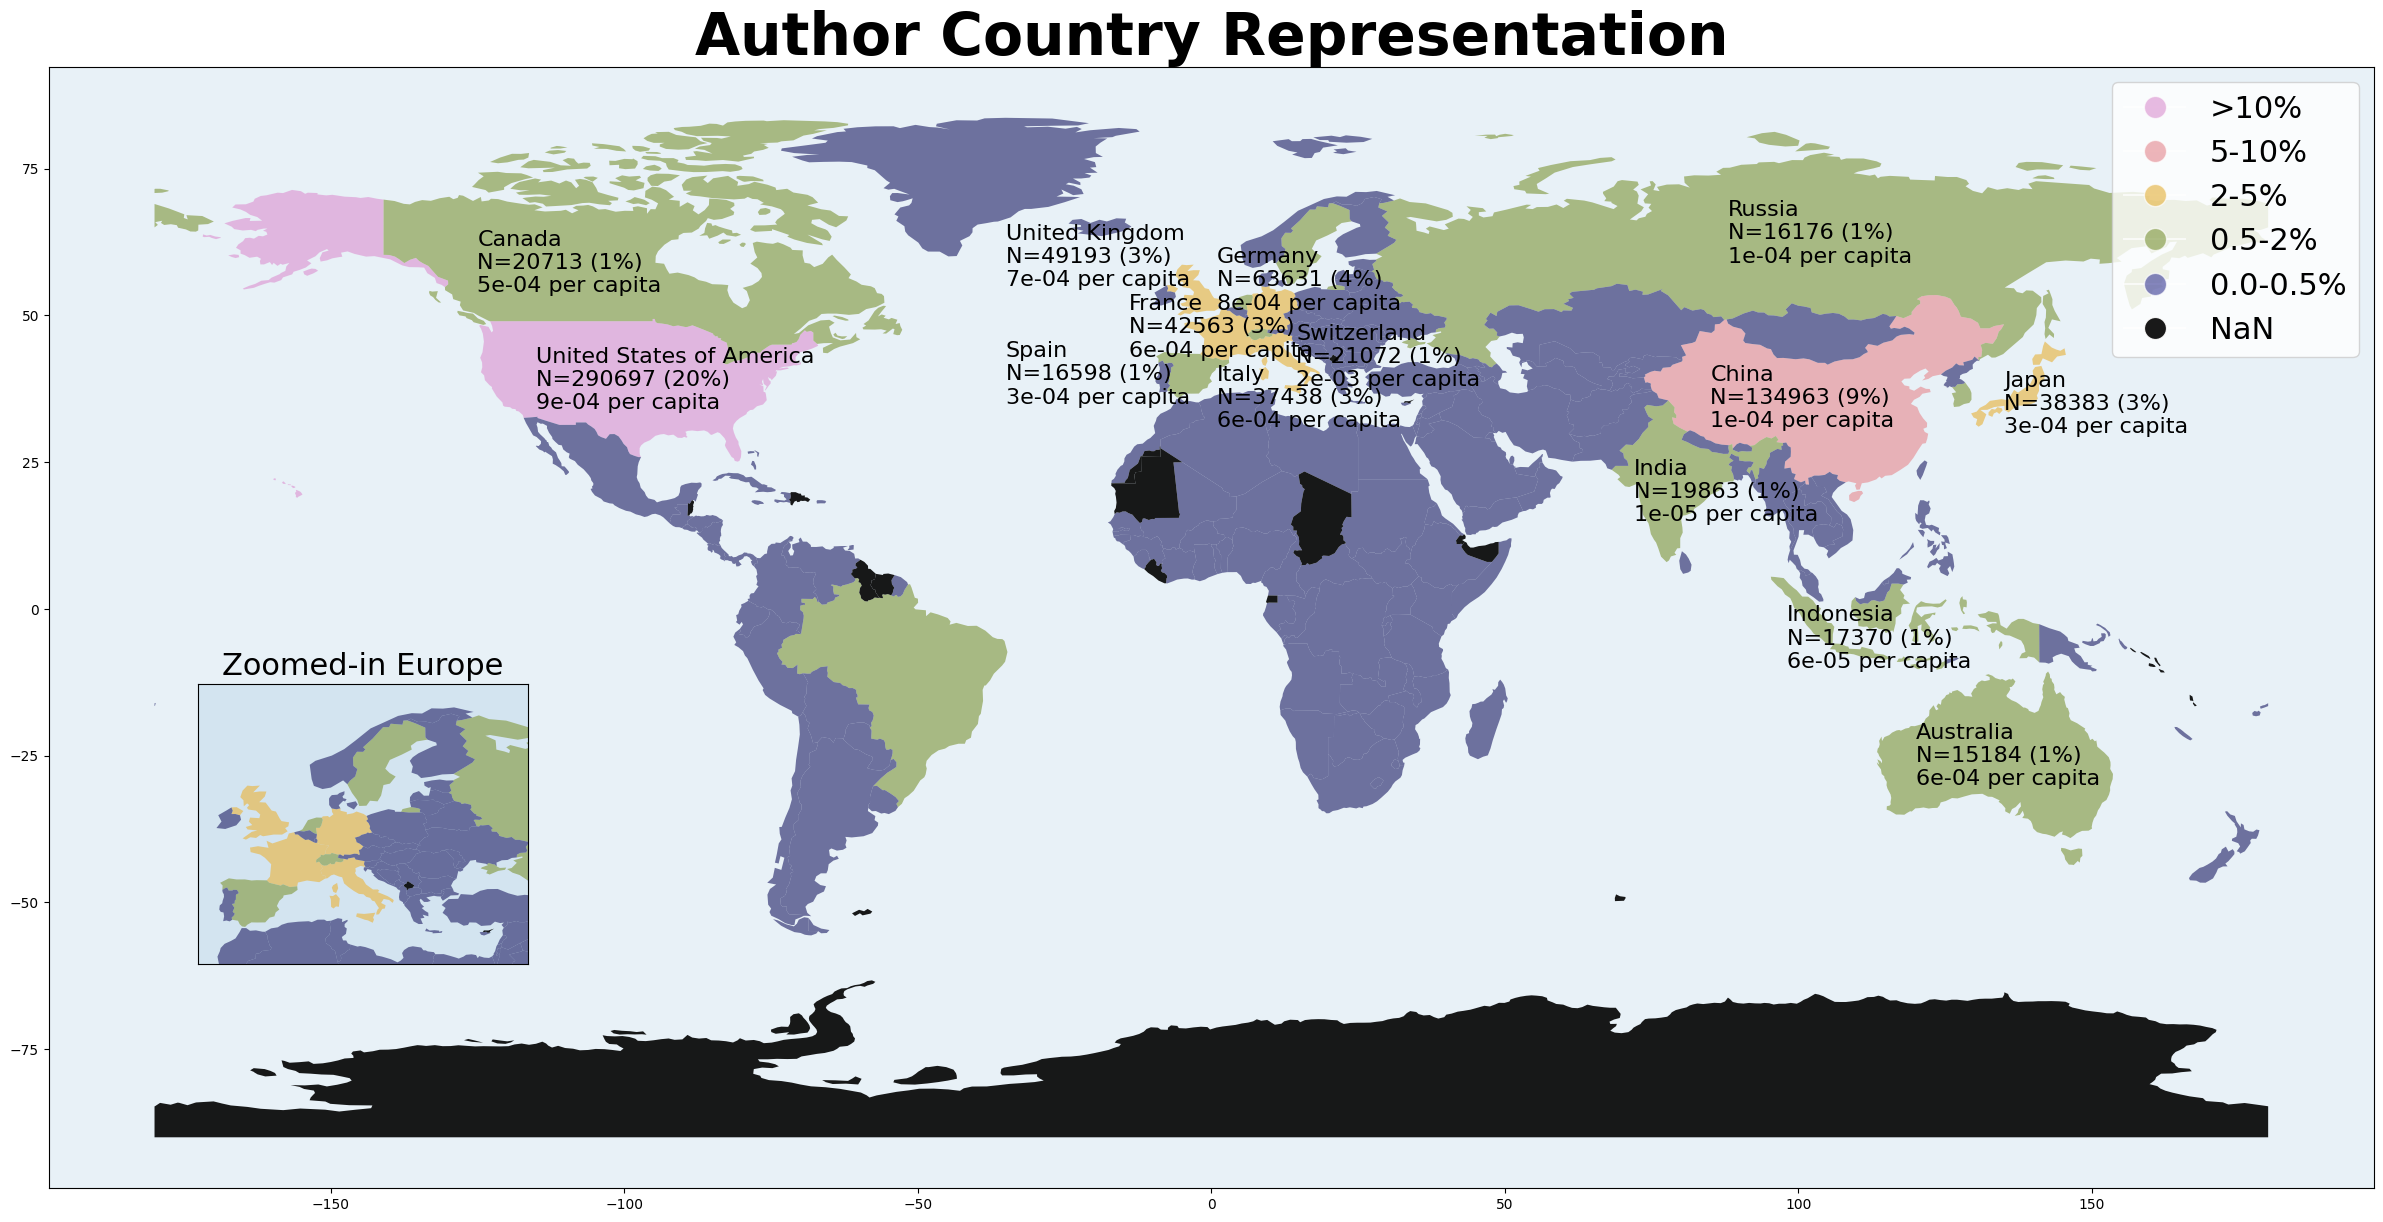

In [116]:

# Create a grid for the subplots
fig, (ax_main) = plt.subplots(figsize=(30, 25))

# Main plot
mergeworld_update.plot(column='proportion',
                scheme='natural_breaks',
                cmap='tab20b', 
                alpha=0.7,
                ax=ax_main,
                missing_kwds={'color': 'k', 'alpha':0.9}, 
                legend=False)

ax_main.set_title('Author Country Representation', fontsize=42, weight='bold')
ax_main.legend(handles=legend_elements, loc='upper right', fontsize=22)

# Add countries names and numbers for most appearing countries 
for i in range(len(mergeworld_update[mergeworld_update['proportion'] >= 1])):
    text_to_display = "{}\n{}\n{}".format(
        mergeworld_update.map_name[i],
        f'N={round(mergeworld_update.proportion_count[i])} ({round(mergeworld_update.proportion[i])}%)',
        f'{mergeworld_update.per_capita[i]:.0e} per capita'
    )
    
    ax_main.text(
        float(mergeworld_update.longitude[i]),
        float(mergeworld_update.latitude[i]),
        text_to_display,
        size=16,
        #color=purd_colors[8]
    )



# Europe subplot
#divider = make_axes_locatable(ax_main)
ax_europe = ax_main.inset_axes([0.01,0.2, 0.25, 0.25])
#cax = divider.append_axes("right", size="5%", pad=0.1)
mergeworld_update.plot(column='proportion',
                                                      scheme='natural_breaks',
                                                      cmap='tab20b',
                                                      alpha=0.7,
                                                      ax=ax_europe,
                                                      #cax=None,
                                                      missing_kwds={'color': 'k', 'alpha': 0.9},
                                                      legend=False)

# Set custom limits for the axes in the ax_europe subplot
ax_europe.set_xlim(-13, 40)
ax_europe.set_ylim(30, 75)
ax_main.set_facecolor('tab:blue')
ax_main.patch.set_alpha(0.1)
ax_europe.set_facecolor('tab:blue')
ax_europe.patch.set_alpha(0.1)
ax_europe.set_title('Zoomed-in Europe', fontsize=22) #, weight='bold')
ax_europe.set_xticks([])
ax_europe.set_yticks([])

save_name = 'article_author_data_final_worldmap'
save_path = f'Plots/{date.today()}/{save_name}'
plt.savefig(save_path)

plt.show()


In [113]:
mergeworld_update.groupby('continent')['proportion_count'].sum()

continent
Africa                       8418.0
Antarctica                      0.0
Asia                       261494.0
Europe                     333440.0
North America              315979.0
Oceania                     16749.0
Seven seas (open ocean)         0.0
South America               16065.0
Name: proportion_count, dtype: float64

In [115]:
mergeworld_update.groupby('continent')['proportion'].sum()

continent
Africa                      0.571913
Antarctica                  0.000000
Asia                       17.765709
Europe                     22.653667
North America              21.467379
Oceania                     1.137915
Seven seas (open ocean)     0.000000
South America               1.091444
Name: proportion, dtype: float64